<a href="https://colab.research.google.com/github/pvanand07/Retail-Sales-Prediction-Regression/blob/master/Retail_Sales_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Retail Sales Prediction - Regression



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### Submitted By - Anand Siva P V


# **Project Summary -**

# **GitHub Link -**

https://github.com/pvanand07/Retail-Sales-Prediction-Regression

# **Problem Statement**



### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Required library for Hyperparameter Tuning
!pip install optuna --quiet

# Required library for visualizing missing values
!pip install missingno --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.7 MB/s eta 0:00:00


In [2]:
# Import Libraries
import optuna
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seed value for reproducibility
np.random.seed(42)

### Load dataset from Google Drive and convert to dataframe

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Data & Resources/Rossmann Stores Data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Almabetter/Data & Resources/store.csv')

In [5]:
print(df.shape)
df.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
#df2 = pd.read_csv('/content/drive/MyDrive/Almabetter/Almabetter Projects/Data & Resources/store.csv')
print(df2.shape)
df2.head()

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


 We have a fact table(df1) that contains the sales data for each store and date and a dimension table(df2) that contains each store information. We can merge the fact table with the dimension table for easier analysis.

In [7]:
df.set_index('Store', inplace=True)
df2.set_index('Store', inplace=True)
df_m = df.join(df2, on='Store')

### Dataset First View

In [8]:
# Dataset First Look
df_m.sample(5)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,,,,,,,,,
616,7,2015-05-24,0,0,0,0,0,0,a,c,3040.0,8.0,2011.0,1,35.0,2010.0,"Mar,Jun,Sept,Dec"
592,2,2013-03-26,5548,710,1,1,0,1,a,a,2540.0,6.0,2005.0,0,NaN,NaN,NaN
526,6,2013-09-14,7467,1150,1,0,0,0,a,a,120.0,NaN,NaN,1,48.0,2011.0,"Mar,Jun,Sept,Dec"
601,2,2013-07-23,3360,323,1,0,0,1,d,a,8220.0,4.0,2014.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
953,1,2014-12-15,11414,853,1,1,0,0,a,a,19830.0,4.0,2006.0,1,22.0,2011.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
print(f'The dataset has {df_m.shape[0]} rows and {df_m.shape[1]} columns')

The dataset has 1017209 rows and 17 columns


In [10]:
df_m.to_csv('df_m.csv')

### Dataset Information

In [11]:
# Dataset Info
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 1 to 1115
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  int64  
 1   Date                       1017209 non-null  object 
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo2         

### Data Cleaning

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
print('The dataset has:',df_m.duplicated().sum(),'duplicate rows')

The dataset has: 595 duplicate rows


#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
missing_values = df_m.isna().sum().sort_values(ascending=False)
print('Features with missing values','Percent missing values:\n')
missing = missing_values[missing_values > 0]
# percentage of missing values
print((missing_values[missing_values > 0]*100/df_m.shape[0]))

Features with missing values Percent missing values:

PromoInterval                49.943620
Promo2SinceYear              49.943620
Promo2SinceWeek              49.943620
CompetitionOpenSinceYear     31.787764
CompetitionOpenSinceMonth    31.787764
CompetitionDistance           0.259730
dtype: float64


<Axes: >

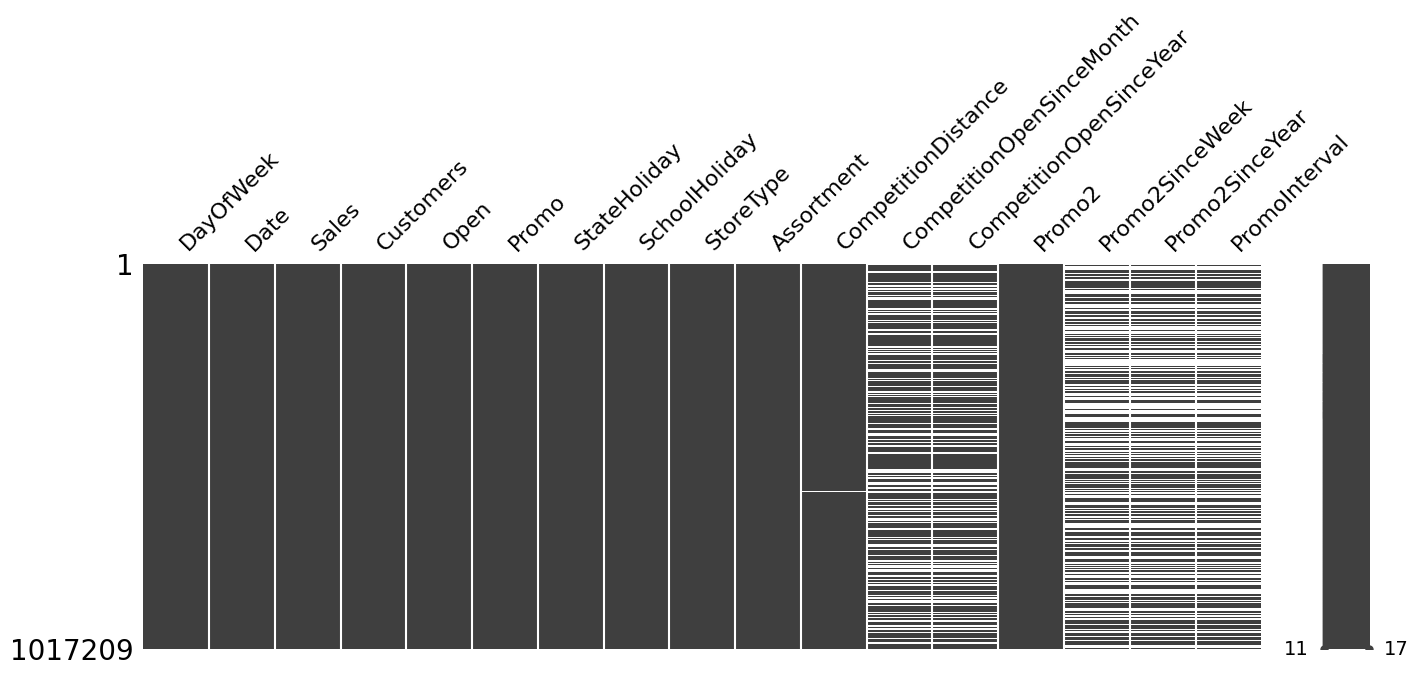

In [14]:
# Visualizing the missing values
msno.matrix(df_m, figsize=(16, 5))

### What did you know about your dataset?

The dataset represents historical sales data for 1,115 Rossmann stores. The dataset contains 1,017,209 entries (rows) and 17 features (columns). The dataset contains 595 duplicate entries and 5 features with more than 30% missing values.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df_m.columns.tolist()

['DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [16]:
# Dataset Describe
df_m.describe()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description

The dataset includes the following features:

- **Id**: Represents a unique identifier for a combination of Store and Date within the test set.
- **Store**: A unique identifier for each store.
- **Sales**: The turnover (sales) for a given day, which is the target variable to be predicted.
- **Customers**: The number of customers on a given day.
- **Open**: An indicator of whether the store was open: 0 = closed, 1 = open.
- **StateHoliday**: Indicates a state holiday. Most stores are closed on state holidays, except for a few exceptions. The values are: a = public holiday, b = Easter holiday, c = Christmas, 0 = None.
- **SchoolHoliday**: Indicates whether the (Store, Date) was affected by the closure of public schools.
- **StoreType**: Differentiates between four different store models: a, b, c, d.
- **Assortment**: Describes the assortment level of the store: a = basic, b = extra, c = extended.
- **CompetitionDistance**: The distance in meters to the nearest competitor store.
- **CompetitionOpenSince[Month/Year]**: Provides an approximate year and month when the nearest competitor store was opened.
- **Promo**: Indicates whether a store is running a promotion on a given day.
- **Promo2**: Represents a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating.
- **Promo2Since[Year/Week]**: Describes the year and calendar week when the store started participating in Promo2.
- **PromoInterval**: Describes the consecutive intervals when Promo2 is started, specifying the months in which the promotion is started anew. For example, "Feb,May,Aug,Nov" means the promotion starts in February, May, August, and November of any given year for that store.

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
df_m.nunique().sort_values(ascending=False)

Sales                        21734
Customers                     4086
Date                           942
CompetitionDistance            654
Promo2SinceWeek                 24
CompetitionOpenSinceYear        23
CompetitionOpenSinceMonth       12
DayOfWeek                        7
Promo2SinceYear                  7
StateHoliday                     5
StoreType                        4
Assortment                       3
PromoInterval                    3
SchoolHoliday                    2
Promo2                           2
Promo                            2
Open                             2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

#### lets drop the duplicate values previously found

In [18]:
df_m.drop_duplicates(inplace=True)

#### There are data points when the stores are 'closed'

In [19]:
# Checking value counts during 'open' and 'closed'
print(df_m['Open'].value_counts())

1    844392
0    172222
Name: Open, dtype: int64


In [20]:
# Checking sum of sales during 'open' and 'closed'
print(df_m[['Open','Sales']].groupby(['Open']).sum())

           Sales
Open            
0              0
1     5873180623


- Since there are no sales when the stores are 'closed' we can drop the values where store is 'closed'.
- We can drop the 'Open' column since it contains only 1 unique value.

In [21]:
# Selecting only the rows with Open = 1
df_m2 = df_m[df_m['Open'] == 1].drop('Open', axis=1).copy()

# Converting Date to Datetime for analysis and feature engineering
df_m2['Date'] = pd.to_datetime(df_m2['Date'])

# We can also convert object Dtype to category for reduced memory usage
for col in df_m2.select_dtypes('object').columns:
  df_m2[col] = df_m2[col].astype('category')

In [22]:
df_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 1 to 1097
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DayOfWeek                  844392 non-null  int64         
 1   Date                       844392 non-null  datetime64[ns]
 2   Sales                      844392 non-null  int64         
 3   Customers                  844392 non-null  int64         
 4   Promo                      844392 non-null  int64         
 5   StateHoliday               844392 non-null  category      
 6   SchoolHoliday              844392 non-null  int64         
 7   StoreType                  844392 non-null  category      
 8   Assortment                 844392 non-null  category      
 9   CompetitionDistance        842206 non-null  float64       
 10  CompetitionOpenSinceMonth  575773 non-null  float64       
 11  CompetitionOpenSinceYear   575773 non-null  float64   

In [23]:
#checking number of unique values in each categorical column
[df_m2[col].value_counts() for col in df_m2.select_dtypes('category').columns]

[0    731342
 0    112140
 a       694
 b       145
 c        71
 Name: StateHoliday, dtype: int64,
 a    457077
 d    258774
 c    112978
 b     15563
 Name: StoreType, dtype: int64,
 a    444909
 c    391271
 b      8212
 Name: Assortment, dtype: int64,
 Jan,Apr,Jul,Oct     242411
 Feb,May,Aug,Nov      98005
 Mar,Jun,Sept,Dec     80669
 Name: PromoInterval, dtype: int64]

In [24]:
# Checking unique values in 'StateHoliday'
print(df_m2['StateHoliday'].unique())

['0', 'a', 'b', 'c', 0]
Categories (5, object): [0, '0', 'a', 'b', 'c']


The 'StateHoliday' column contains a mix of integer and string representations of the "0" value. This can cause the value counts to show duplicates.

In [25]:
# Replace all variations of "0" with a single representation
df_m2['StateHoliday'] = df_m2['StateHoliday'].replace(['0', 0], '0')

### What all manipulations have you done and insights you found?

- The dataset contains a mix of categorical and numerical columns.
-  The sum of sales for closed stores are zero Hence selecting only the rows with Open = 1.
- Dropped the 'Open' column since it contains only one unique value (1 for open stores).
- Converted the 'Date' column to datetime data type for analysis and feature engineering purposes.
- The 'StateHoliday' column has a mix of integer and string representations of the "0" value, which has been resolved by replacing all variations of "0" with str(0).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
df_m.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

#### Helper functions for cleaning up the data (Helps better visualize the data)

In [ ]:
def cap_outliers(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    cleaned_df = df.copy()

    # Iterate over numerical columns
    for column in cleaned_df.select_dtypes(include=np.number):
        # Calculate the 99th percentile value
        upper_cap_value = cleaned_df[column].quantile(0.95)
        lower_cap_value = cleaned_df[column].quantile(0.05)

        # Cap outliers to the 99th percentile value
        cleaned_df[column] = np.where(cleaned_df[column] > upper_cap_value, upper_cap_value, cleaned_df[column])
        cleaned_df[column] = np.where(cleaned_df[column] < lower_cap_value, lower_cap_value, cleaned_df[column])

    return cleaned_df

### 2. Univariate Analysis

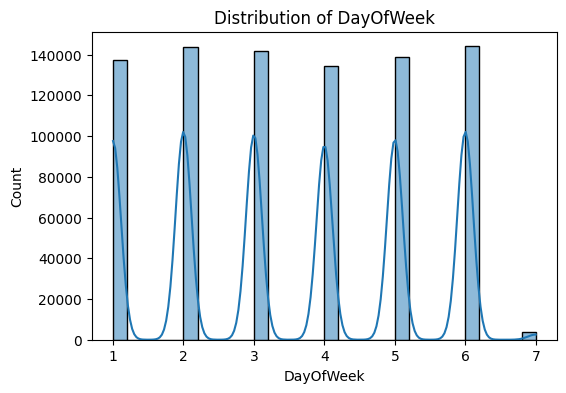

Mean of DayOfWeek: 3.5203613961288123
Median of DayOfWeek: 3.0
Standard deviation of DayOfWeek: 1.7236892212836188
Min Value of DayOfWeek: 1
Max Value of DayOfWeek: 7


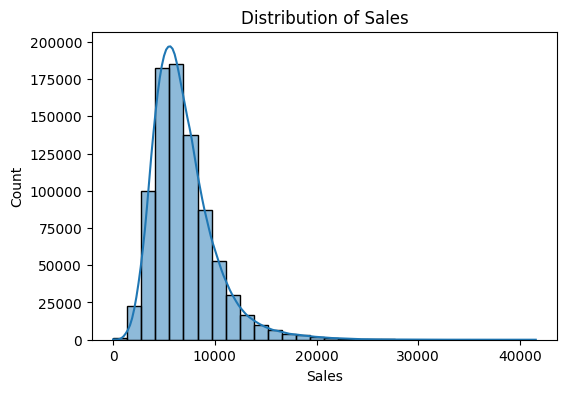

Mean of Sales: 6955.514290755952
Median of Sales: 6369.0
Standard deviation of Sales: 3104.214680428348
Min Value of Sales: 0
Max Value of Sales: 41551


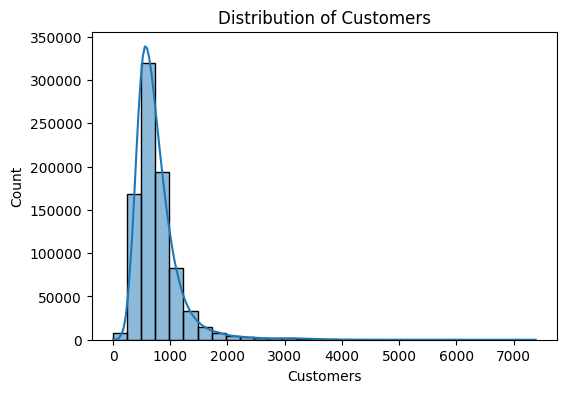

Mean of Customers: 762.7283951055907
Median of Customers: 676.0
Standard deviation of Customers: 401.2276743180318
Min Value of Customers: 0
Max Value of Customers: 7388


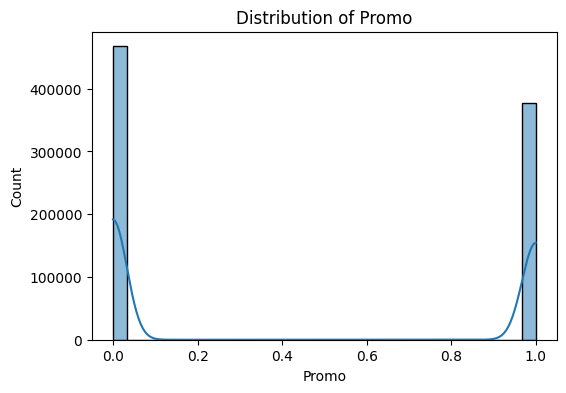

Mean of Promo: 0.44635193133047213
Median of Promo: 0.0
Standard deviation of Promo: 0.4971138475147211
Min Value of Promo: 0
Max Value of Promo: 1


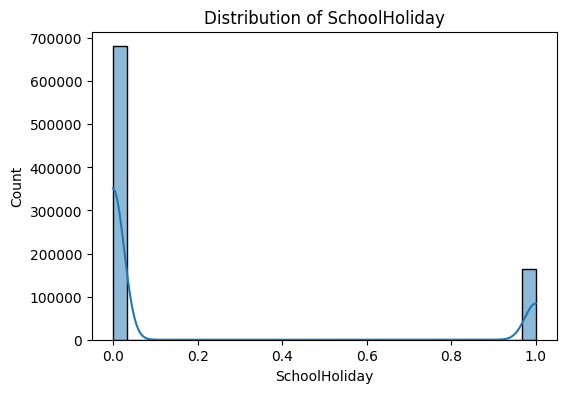

Mean of SchoolHoliday: 0.19357952230717487
Median of SchoolHoliday: 0.0
Standard deviation of SchoolHoliday: 0.3951033734671867
Min Value of SchoolHoliday: 0
Max Value of SchoolHoliday: 1


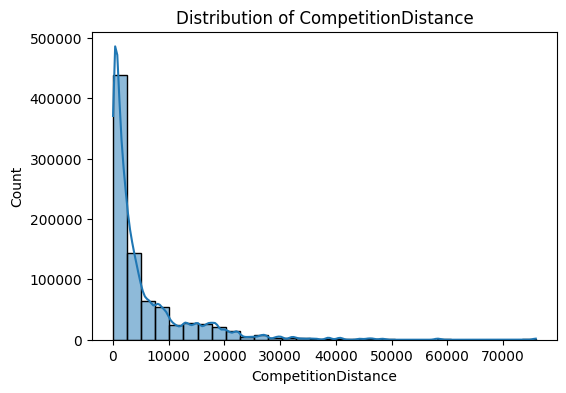

Mean of CompetitionDistance: 5457.979627312083
Median of CompetitionDistance: 2320.0
Standard deviation of CompetitionDistance: 7809.437311012042
Min Value of CompetitionDistance: 20.0
Max Value of CompetitionDistance: 75860.0


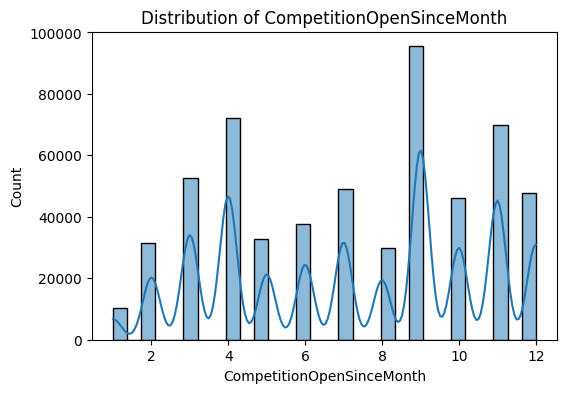

Mean of CompetitionOpenSinceMonth: 7.224878554569249
Median of CompetitionOpenSinceMonth: 8.0
Standard deviation of CompetitionOpenSinceMonth: 3.210143833035446
Min Value of CompetitionOpenSinceMonth: 1.0
Max Value of CompetitionOpenSinceMonth: 12.0


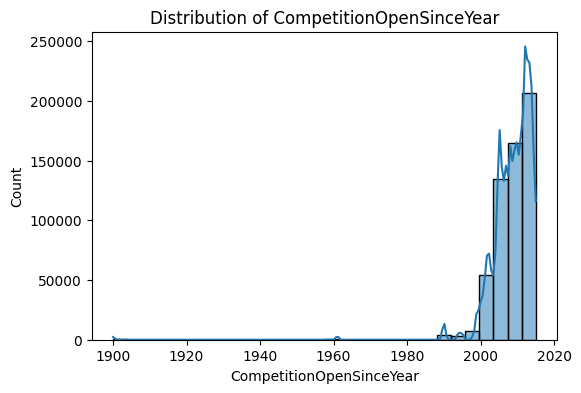

Mean of CompetitionOpenSinceYear: 2008.6977472024564
Median of CompetitionOpenSinceYear: 2010.0
Standard deviation of CompetitionOpenSinceYear: 5.978048138332688
Min Value of CompetitionOpenSinceYear: 1900.0
Max Value of CompetitionOpenSinceYear: 2015.0


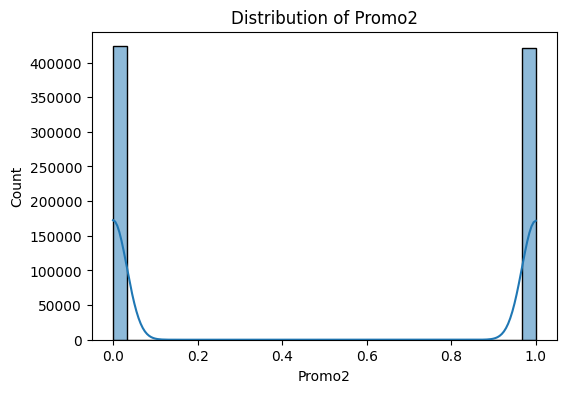

Mean of Promo2: 0.49868426039090846
Median of Promo2: 0.0
Standard deviation of Promo2: 0.4999985648965411
Min Value of Promo2: 0
Max Value of Promo2: 1


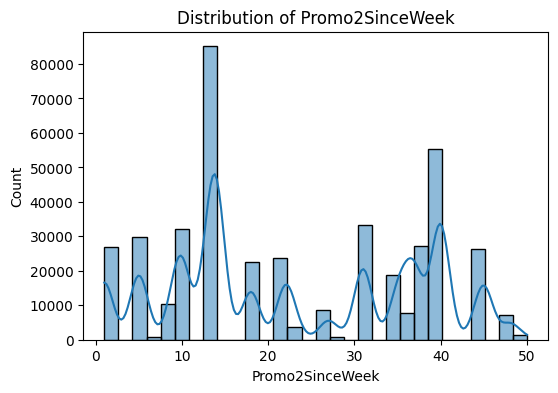

Mean of Promo2SinceWeek: 23.25342626785566
Median of Promo2SinceWeek: 22.0
Standard deviation of Promo2SinceWeek: 14.100568584277404
Min Value of Promo2SinceWeek: 1.0
Max Value of Promo2SinceWeek: 50.0


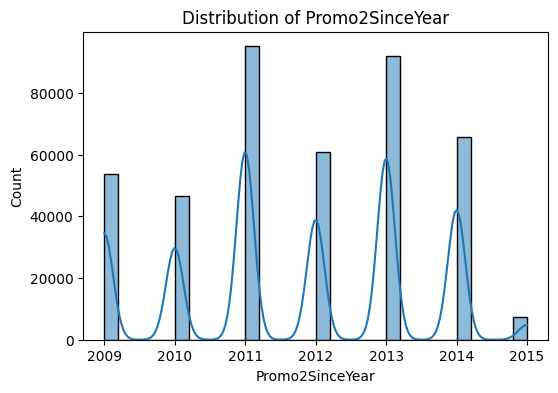

Mean of Promo2SinceYear: 2011.754018784806
Median of Promo2SinceYear: 2012.0
Standard deviation of Promo2SinceYear: 1.6609621263211622
Min Value of Promo2SinceYear: 2009.0
Max Value of Promo2SinceYear: 2015.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_temp = df_m2.copy()
# Numerical features
numerical_features = (df_temp.select_dtypes(include=['int64', 'float64']).columns)

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_temp[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

    # Central tendencies and dispersion
    mean = df_temp[feature].mean()
    median = df_temp[feature].median()
    std_dev = df_temp[feature].std()
    print(f'Mean of {feature}: {mean}')
    print(f'Median of {feature}: {median}')
    print(f'Standard deviation of {feature}: {std_dev}')
    print(f'Min Value of {feature}: {df_temp[feature].min()}')
    print(f'Max Value of {feature}: {df_temp[feature].max()}')

In [ ]:
df_temp['Date'] = pd.to_datetime(df_temp['Date'])
print('Earliest date available:',df_temp['Date'].min())
print('Latest date available:',df_temp['Date'].max())
print('Range of Date:', df_temp['Date'].max() - df_temp['Date'].min())

Earliest date available: 2013-01-01 00:00:00
Latest date available: 2015-07-31 00:00:00
Range of Date: 941 days 00:00:00


#### Insights from above observations

- The sales data is available from `2013-01-01` to `2015-07-31` for a duration of 941 days
- Stores are closed during Sundays hence the sales are reported as zero.
- Only few data points are available during School holidays (`SchoolHoliday`=1) and state holidays =(`StateHoliday` = (a,b,c))
- The distribution of competition distance is right skewed and ranges from 0 to 70000
- The distribution of of competition open since year is left skewed and ranges from 1900 to 2015
- The distribution of competition distance is right skewed and ranges from 20 to 75860

#### Chart - 1 Histogram of sales

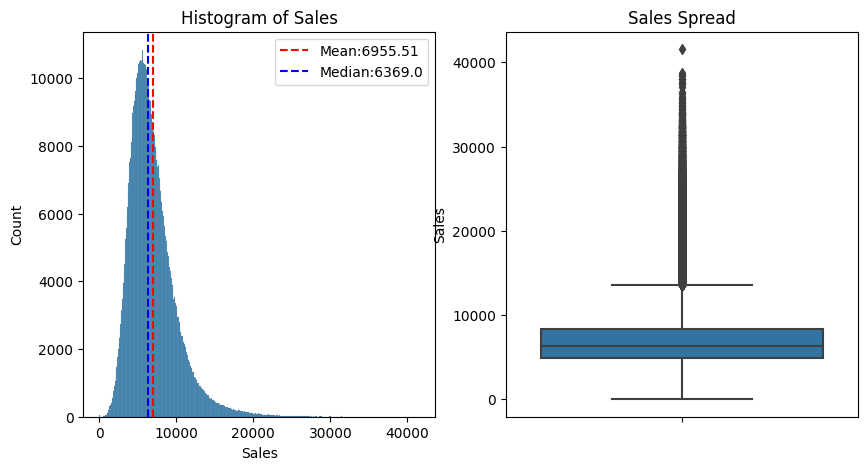

5th Percentile of Sales 3173.0
95th Percentile of Sales 12668.0


In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,5))

data = df_m2

plt.subplot(1,2,1)
plt.title('Histogram of Sales')
sns.histplot(data['Sales'])

# Calculate the mean and median
mean_value = data['Sales'].mean().round(2)
median_value = data['Sales'].median().round(2)

# Draw lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', label='Mean:'+str(mean_value))
plt.axvline(median_value, color='blue', linestyle='--', label='Median:'+str(median_value))
plt.legend()

plt.subplot(1,2,2)
plt.title('Sales Spread')
sns.boxplot(y = data['Sales'])
plt.show()

print('5th Percentile of Sales', data['Sales'].quantile(0.05))
print('95th Percentile of Sales', data['Sales'].quantile(0.95))

##### 1. Why did you pick the specific chart?

- A histogram allows us to see the distribution of data and understand its central tendency and the spread of the dataset
- A box plotprovides a summary of the distribution of a dataset, including information about the median, quartiles, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

- The distribution of sales seems to be skewed to the right.
- 90% of the time the sales per day are within the interval 3173 and 12668
- However the top 5% of the sales are within the interval 12668 and 41551

#### 4.1 Visualizing categorical data

- `StateHoliday`
- `StoreType`
- `Assortment`
- `PromoInterval`

#### Chart - 2 Categorical features vs Sales histogram/Box-Plot

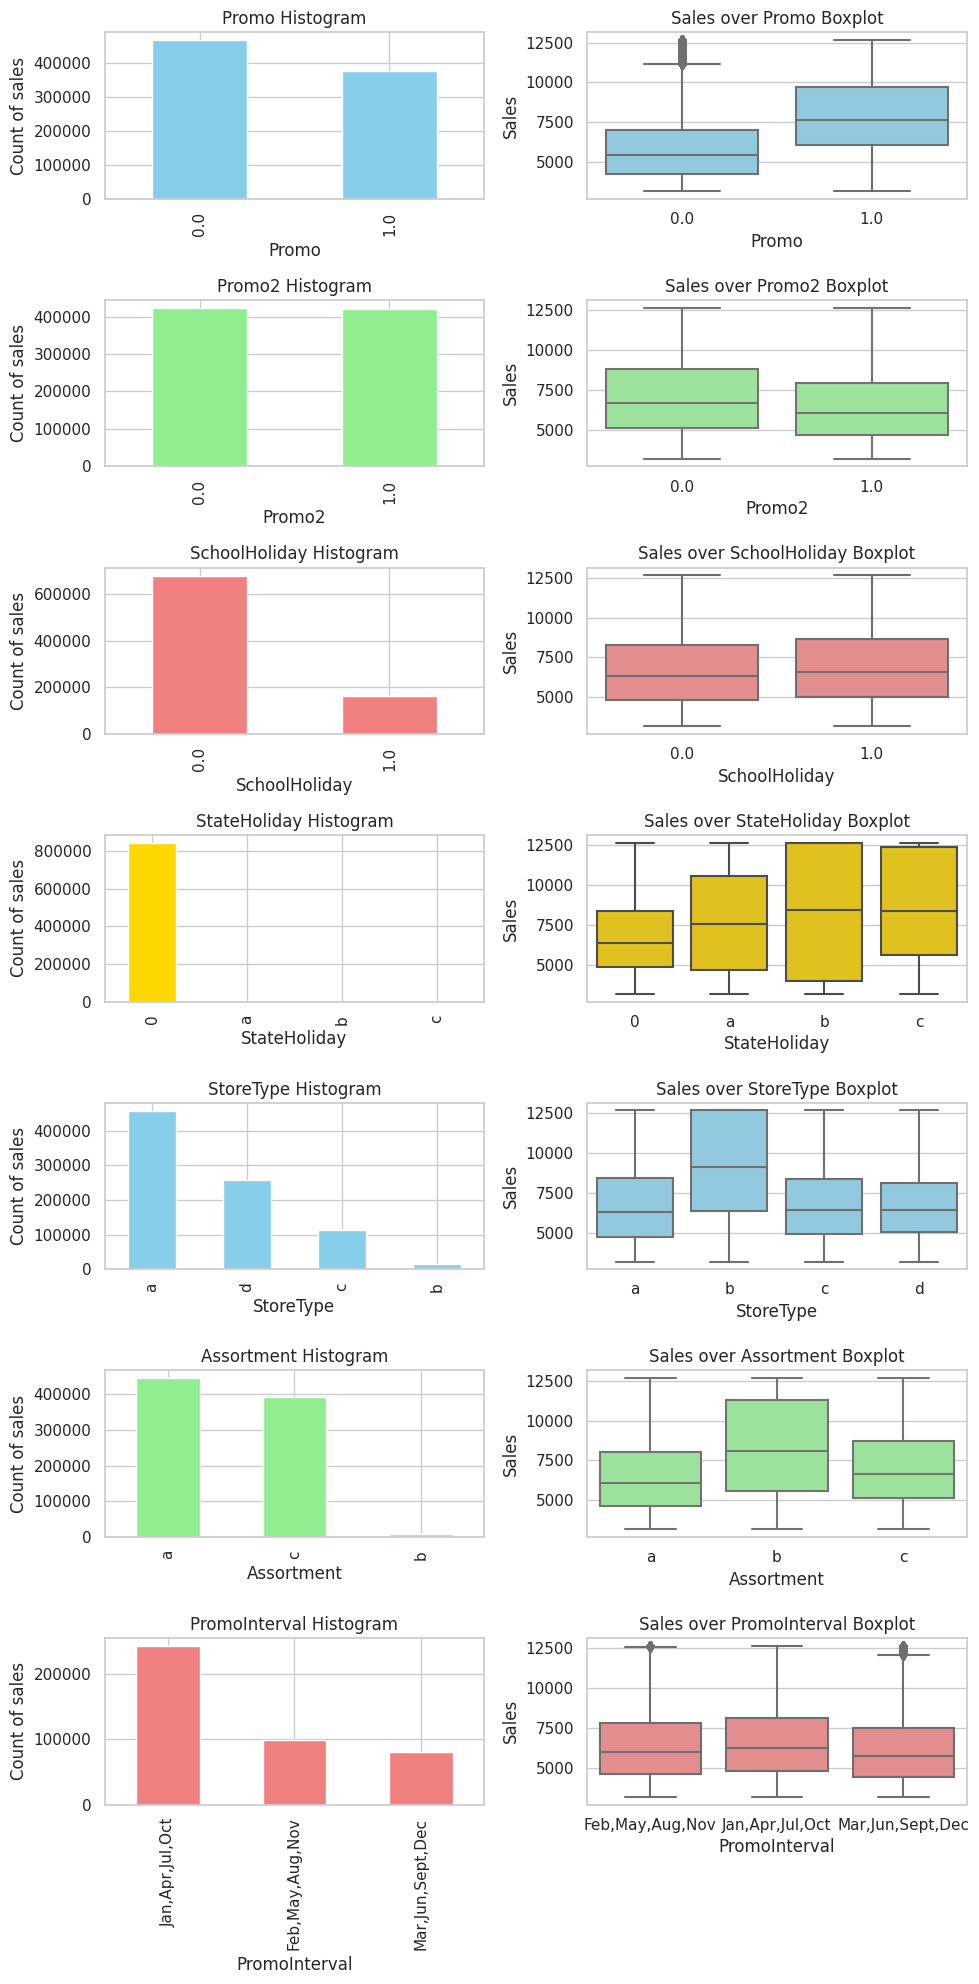

In [ ]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 20))

input = cap_outliers(df_m2.copy())
columns = ['Promo','Promo2','SchoolHoliday','StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
colors = ['skyblue','lightgreen','lightcoral','gold']

color_cycle = itertools.cycle(colors)

for i, col in enumerate(columns):
    color_name = next(color_cycle)
    plt.subplot(7, 2, 2*i+1)
    plt1 = input[col].value_counts().plot(kind='bar', color=color_name)
    plt.title(f'{col} Histogram')
    plt1.set(xlabel=col, ylabel='Count of sales')

    plt.subplot(7, 2, 2*i+2)
    sns.boxplot(x=col, y='Sales', data=input, color=color_name)
    plt.title(f'Sales over {col} Boxplot')
    plt.xlabel(col)
    plt.ylabel('Sales')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- A histogram allows us to see the distribution of data and understand its central tendency and the spread of the dataset
- A box plotprovides a summary of the distribution of a dataset, including information about the median, quartiles, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

1. **Promotion (Promo):**

   - The count of sales and median value of sales is higher when there is a promotion compared to when there is no promotion.

2. **Promotion Type 2 (Promo2):**

   - The count and median value of sales is relatively similar for both Promo2 types.

3. **School Holiday:**

   - The median sales are slightly higher during school holidays.


4. **State Holiday:**

   - The median sales are highest during state holiday type 'a'.

5. **Store Type:**

   - The count of sales is highest for store type 'a'.
   - The median sales are highest for store type 'b'.

6. **Assortment:**

   - The count of sales is highest for assortment type 'a'.
   - The median sales are highest for assortment type 'c'.


7. **Promotion Interval (PromoInterval):**

   - The count of sales is highest for the promo interval 'Jan,Apr,Jul,Oct'.
   - The median sales are highest for the promo interval 'Feb,May,Aug,Nov'.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Understanding the impact of promotions, store types, assortments, and holiday periods on sales can help Rossmann optimize their strategies.
-Targeting promotions during high-sales periods, such as school holidays or specific state holidays, can lead to increased sales and better resource utilization.

In [ ]:
df_temp['DayOfWeek'].sample(10)

Store
379    1
928    6
863    2
93     2
824    4
537    2
449    2
821    3
921    6
777    6
Name: DayOfWeek, dtype: int64

#### Chart - 3 - Continuous features vs Sales - Scatterplot

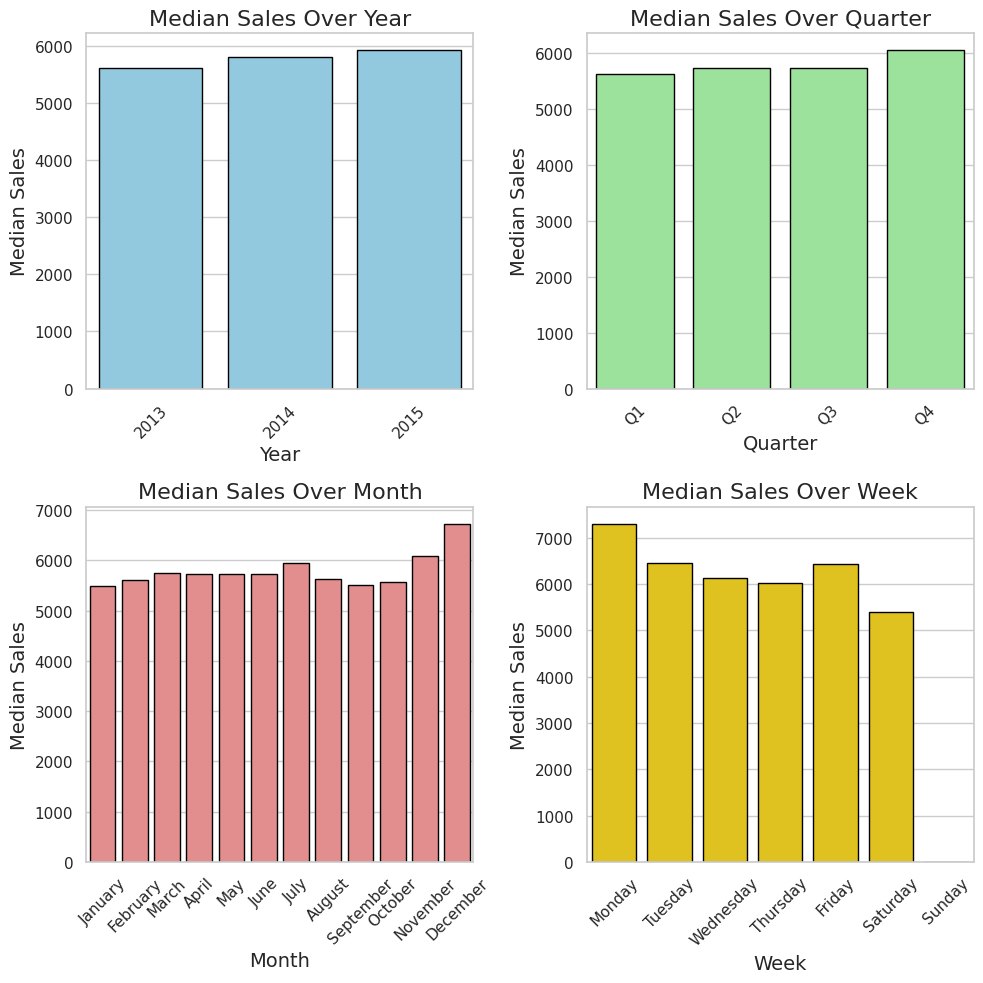

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Create a copy of the dataframe
df_temp = df_m.copy()
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Extract year, month, week, and quarter from the Date
df_temp['year'] = df_temp['Date'].dt.year
df_temp['month'] = df_temp['Date'].dt.month_name()  # Get month names
df_temp['week'] = df_temp['Date'].dt.day_name()    # Get weekday names
df_temp['quarter'] = 'Q' + df_temp['Date'].dt.quarter.astype(str) # Get quarters

# Specify the correct order for months and weekdays
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'month' and 'week' columns to categorical type with specified order
df_temp['month'] = pd.Categorical(df_temp['month'], categories=month_order, ordered=True)
df_temp['week'] = pd.Categorical(df_temp['week'], categories=week_order, ordered=True)

# Set the seaborn style and color palette
sns.set_style("whitegrid")
colors = itertools.cycle(['skyblue', 'lightgreen', 'lightcoral', 'gold'])

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, col in enumerate(['year', 'quarter', 'month', 'week']):
    # Group by year, quarter, month, week and find the median of Sales
    sales_data = df_temp.groupby([col])['Sales'].median()

    # Plotting
    ax = axes[i // 2, i % 2]  # Select the appropriate subplot
    sns.barplot(x=sales_data.index, y=sales_data.values, color=next(colors), edgecolor='black', ax=ax)

    ax.set_title(f'Median Sales Over {col.capitalize()}', fontsize=16)
    ax.set_xlabel(f'{col.capitalize()}', fontsize=14)
    ax.set_ylabel('Median Sales', fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-labels for better visibility

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [ ]:
for i, col in enumerate(['year', 'quarter', 'month', 'week']):
    # Group by year, quarter, month, week and find the median of Sales
    sales_data[col] = df_temp.groupby([col])['Sales'].median()

In [ ]:
pd.DataFrame(sales_data).to_csv('sales_data.csv')

##### 1. Why did you pick the specific chart?

A bar plot helps us to compare a numerical variable across a category.Categorical variable is plotted along the horizontal and the height of the bar represents the value of the numerical variable.

##### 2. What is/are the insight(s) found from the chart?

1. Weekly Sales:
   - The highest sales were observed on Monday with a value of 7,311.0, indicating strong sales at the beginning of the week.
   - Sunday had no sales recorded, suggesting that the business might be closed on Sundays
   - Sales remained relatively consistent throughout the week
   - Saturday had comparatively lower sales with a value of 5,410.0

2. Yearly Sales:
   - The sales data is available for the years 2013, 2014, and 2015.
   - Sales increased from 5,599.0 in 2013 to 5,918.0 in 2015, showing a positive trend over the years.


3. Quarterly Sales:
   - The highest sales were observed in Q4 with a value of 6,044.0, suggesting that the holiday season might contribute significantly to sales.
   - Q1 had the lowest sales with a value of 5,614.0.

4. Monthly Sales:
   - December recorded the highest sales with a value of 6,732.0, indicating a peak in sales during the holiday season.
   - January had the lowest sales with a value of 5,484.0, possibly due to reduced consumer spending after the holiday season.
   - Sales remained relatively stable from February to November, ranging from 5,611.0 to 6,083.0, with minor fluctuations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The business experiences seasonal variation in sales, with the highest sales occurring in Q4 during the holiday season and the lowest sales in Q1.
- Heavy reliance on the holiday season for generating significant revenue can pose challenges in maintaining consistent sales throughout the year. To mitigate negative growth during non-peak seasons, the business should explore strategies to stimulate demand and attract customers during off-peak periods.

#### Chart - 3 - Continuous features vs Sales - Scatterplot

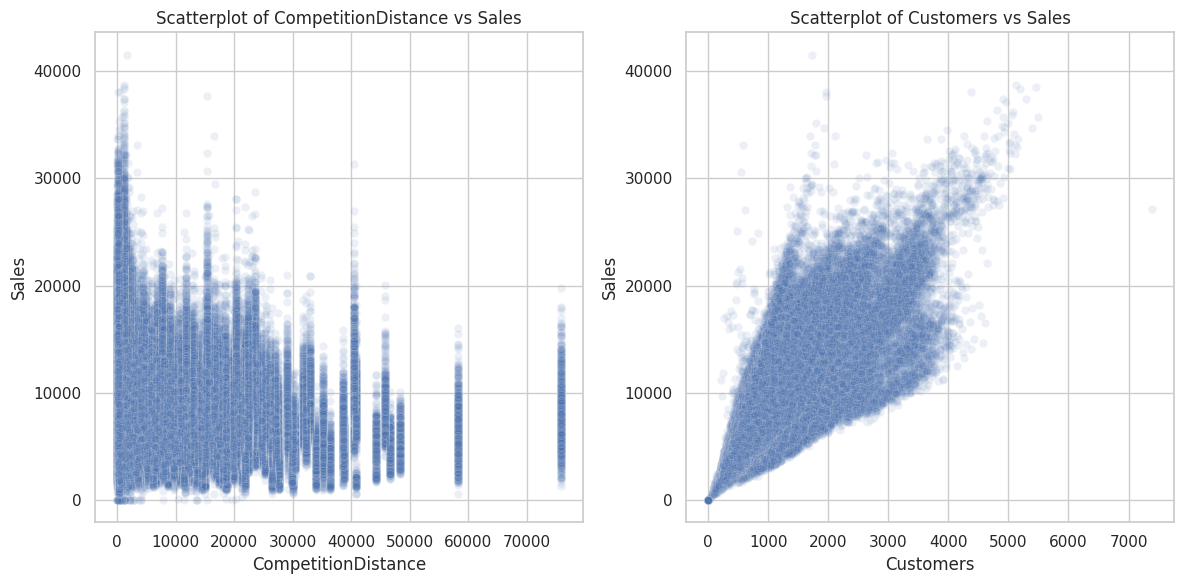

In [ ]:
# Chart - 3 visualizing Numerical Columns
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your data stored in a DataFrame called 'df'
# 'Sales' is the dependent variable, and other numerical columns are independent variables

#numerical_columns = df_m2.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [ 'CompetitionDistance','Customers']

# Calculate the number of rows and columns needed for the subplots
num_rows = (len(numerical_columns) // 2)
num_cols = 2

# Create subplots with 2 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Flatten the axes array if necessary
axes = axes.flatten() if isinstance(axes, np.ndarray) else axes

# Iterate through each numerical column and create scatterplots in the subplots
for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=column, y='Sales', data=df_m2, ax=axes[i], alpha=0.1, markers=['o'])
    axes[i].set_title(f'Scatterplot of {column} vs Sales')

# Remove any empty subplots if the number of variables is odd
if len(numerical_columns) % 2 != 0:
    axes[-1].remove()

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatterplot helps us to visualize the relationship between two continuous variables. It consists of a grid where each point represents an observation , plotted along the horizontal and vertical axes corresponding to the two variables being analyzed.

##### 2. What is/are the insight(s) found from the chart?

1. **Competition Distance vs Sales:**

- The competition distance is negatively correlated with sales.Suggesting that the areas with higher competetion generates higher sales

2. **Customers vs Sales:**

- The customers are positively correlated with sales. Increased number of customers visting the store leads to higher sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Strategic decisions regarding store locations can be made based on competition distance to optimize sales and capture a larger market share.

In [ ]:
df_m2[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].sample(10)

,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
Store,,
776,4.0,2009.0
950,11.0,1994.0
464,3.0,2009.0
1089,5.0,2009.0
204,12.0,2002.0
414,NaN,NaN
775,12.0,2005.0
1010,6.0,2010.0
1102,11.0,2012.0


In [ ]:
df_temp[['Promo2SinceWeek','Promo2SinceYear']].describe()

,Promo2SinceWeek,Promo2SinceYear
count,509178.000000,509178.000000
mean,23.269093,2011.752774
std,14.095973,1.662870
min,1.000000,2009.000000
25%,13.000000,2011.000000
50%,22.000000,2012.000000
75%,37.000000,2013.000000
max,50.000000,2015.000000


In [ ]:
df_temp2

,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,PromoInterval,week_number,month,year,IsPromoMonth,Av_sales/Assorment/StoreType/Month,Av_customers/Assorment/StoreType/Month,CompetitionDistanceBin,CompetitionOpenSinceDay,Promo2SinceDay
0,5.0,2015-07-31,5263.0,555.0,1.0,0,1.0,c,a,1270.0,...,"Jan,Apr,Jul,Oct",31,7,2015,1,6730.841023,811.134403,1,-2524.0,-1153
1,5.0,2015-07-31,14180.0,1586.0,1.0,0,1.0,c,a,430.0,...,"Jan,Apr,Jul,Oct",31,7,2015,1,6730.841023,811.134403,1,-4361.0,-1153
2,5.0,2015-07-31,11144.0,1162.0,1.0,0,1.0,c,a,2240.0,...,"Jan,Apr,Jul,Oct",31,7,2015,1,6730.841023,811.134403,1,-2159.0,-1153
3,5.0,2015-07-31,9091.0,888.0,1.0,0,1.0,c,a,4230.0,...,"Jan,Apr,Jul,Oct",31,7,2015,1,6730.841023,811.134403,1,-242.0,-1153
4,5.0,2015-07-31,7628.0,775.0,1.0,0,0.0,c,a,1200.0,...,"Jan,Apr,Jul,Oct",31,7,2015,1,6730.841023,811.134403,1,-3620.0,-1574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,4.0,2013-08-01,5670.0,612.0,1.0,0,1.0,c,c,3330.0,...,"Jan,Apr,Jul,Oct",31,8,2013,0,6796.880344,777.461966,1,-4322.0,-845
844388,4.0,2013-08-01,9345.0,989.0,1.0,0,1.0,c,c,10450.0,...,"Jan,Apr,Jul,Oct",31,8,2013,0,6796.880344,777.461966,2,-1522.0,-424
844389,4.0,2013-08-01,4375.0,486.0,1.0,0,1.0,c,c,330.0,...,"Feb,May,Aug,Nov",31,8,2013,1,6796.880344,777.461966,1,-1734.0,-177
844390,4.0,2013-08-01,5635.0,650.0,1.0,0,1.0,c,c,900.0,...,"Jan,Apr,Jul,Oct",31,8,2013,0,6796.880344,777.461966,1,-1065.0,-424


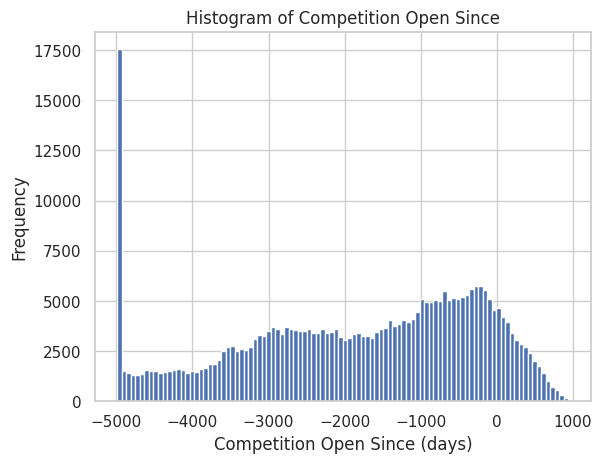

In [ ]:
import pandas as pd
df_temp = df_m.copy()
df_temp['Date'] = pd.to_datetime(df_temp['Date'])


df_temp.dropna(inplace=True)
df_temp['CompetitionOpenSinceDay'] = (pd.to_datetime(
    df_temp['CompetitionOpenSinceYear'].astype(int).astype(str) + '-' +
    df_temp['CompetitionOpenSinceMonth'].astype(int).astype(str) + '-1'
)-df_temp['Date']).dt.days
#--------------------------------

# Convert Timedelta to days (numeric values)
#df_temp['CompetitionOpenSinceDay'] = df_temp['CompetitionOpenSinceDay']

upper_cap = df_temp['CompetitionOpenSinceDay'].quantile(0.95)
lower_cap = df_temp['CompetitionOpenSinceDay'].quantile(0.05)

df_temp2 = df_temp.copy()
# reaplace outliers with capped value
df_temp2['CompetitionOpenSinceDay'] = np.where(df_temp['CompetitionOpenSinceDay'] > upper_cap, upper_cap, df_temp['CompetitionOpenSinceDay'])
df_temp2['CompetitionOpenSinceDay'] = np.where(df_temp['CompetitionOpenSinceDay'] < lower_cap, lower_cap, df_temp['CompetitionOpenSinceDay'])

# Plot histogram
plt.hist(df_temp2['CompetitionOpenSinceDay'], bins=100)
plt.xlabel('Competition Open Since (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Competition Open Since')
plt.show()

#--------------------------------------------------------------------

df_temp2['Promo2SinceWeek'] = df_temp2['Promo2SinceWeek'].astype(int)
df_temp2['Promo2SinceYear'] = df_temp2['Promo2SinceYear'].astype(int)

df_temp2['Promo2SinceDay'] = (pd.to_datetime(df_temp2['Promo2SinceYear'].astype(str), format='%Y') + \
                             pd.to_timedelta(df_temp2['Promo2SinceWeek'] * 7, unit='days')-df_temp2['Date']).dt.days


In [ ]:

df_temp2['Promo2SinceDay']

Store
2      -1946
3      -1574
11     -1300
14     -1392
15     -1574
        ... 
1105      35
1106     217
1107   -1005
1109    -212
1111     217
Name: Promo2SinceDay, Length: 324326, dtype: int64

In [ ]:
# # Convert Timedelta to days (numeric values)
# #df_temp['CompetitionOpenSinceDay'] = df_temp['CompetitionOpenSinceDay'].dt.days

# upper_cap = df_temp['CompetitionOpenSinceDay'].quantile(0.95)
# lower_cap = df_temp['CompetitionOpenSinceDay'].quantile(0.05)

# df_temp2 = df_temp[(df_temp['CompetitionOpenSinceDay'] > lower_cap) & (df_temp['CompetitionOpenSinceDay'] < upper_cap)]
# # Plot histogram
# plt.hist(df_temp2['CompetitionOpenSinceDay'], bins=50)
# plt.xlabel('Competition Open Since (days)')
# plt.ylabel('Frequency')
# plt.title('Histogram of Competition Open Since')
# plt.show()


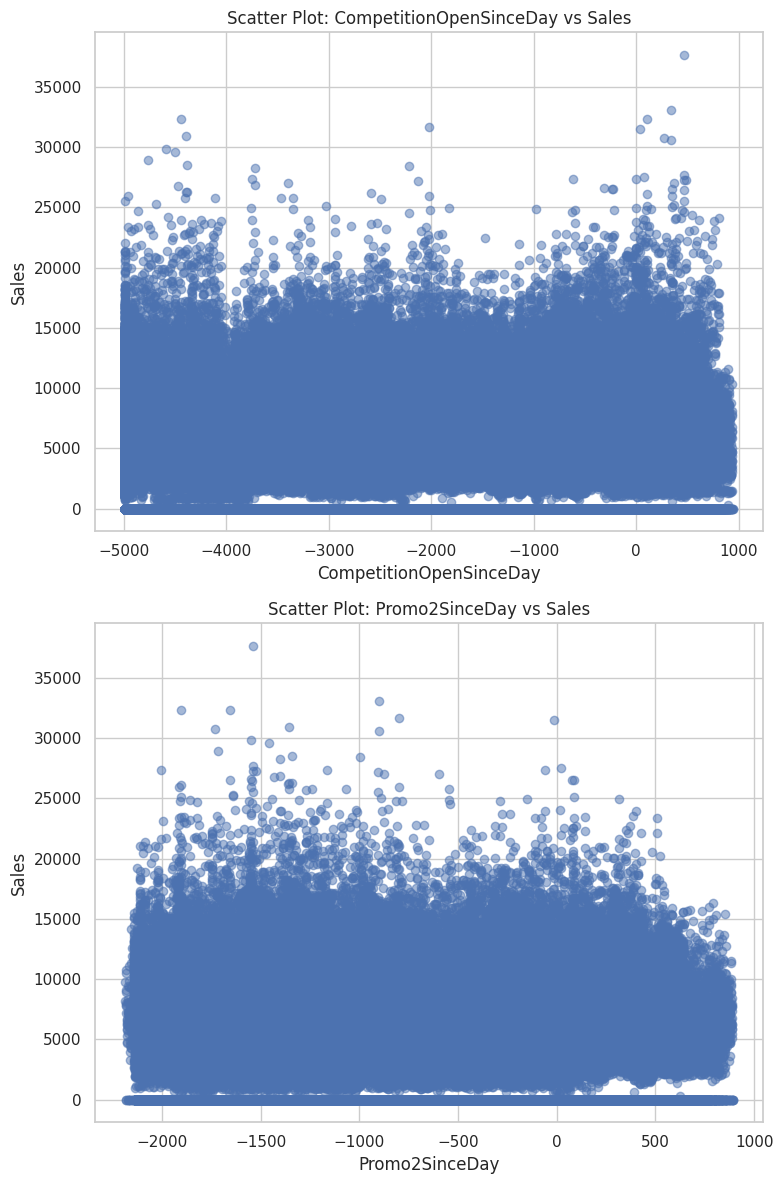

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

multiclass = ['CompetitionOpenSinceDay', 'Promo2SinceDay']
dataframe = df_temp2.copy()
target = 'Sales'

fig, axes = plt.subplots(len(multiclass), figsize=(8, 6 * len(multiclass)))

for i, feature in enumerate(multiclass):
    axes[i].scatter(dataframe[feature], dataframe[target], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'Scatter Plot: {feature} vs {target}')

plt.tight_layout()
plt.show()


In [ ]:
df_temp[['CompetitionOpenSinceDay']].describe()

,CompetitionOpenSinceDay
count,324326.000000
mean,-2027.996241
std,2723.419313
min,-42214.000000
25%,-3003.000000
50%,-1599.000000
75%,-517.000000
max,942.000000


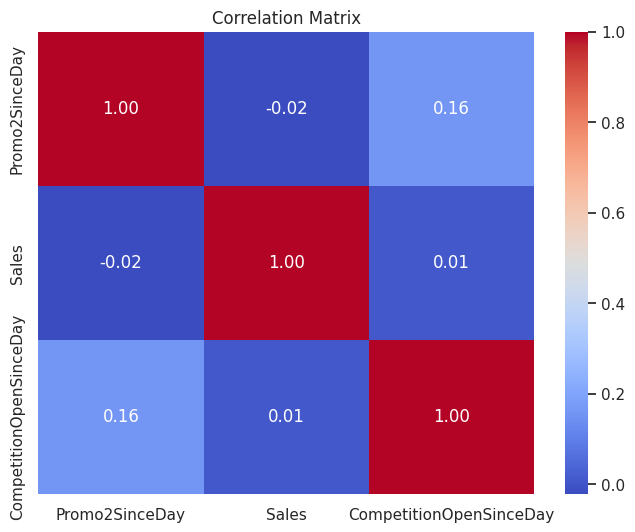

In [ ]:
import seaborn as sns

# Convert Promo2SinceDay to days (numeric values)
#df_temp2['Promo2SinceDay'] = df_temp2['Promo2SinceDay'].dt.days

# Select the variables for correlation matrix
variables = ['Promo2SinceDay', 'Sales','CompetitionOpenSinceDay']

# Create a subset DataFrame with the selected variables
subset_df = df_temp2[variables]

# Compute the correlation matrix
corr_matrix = subset_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


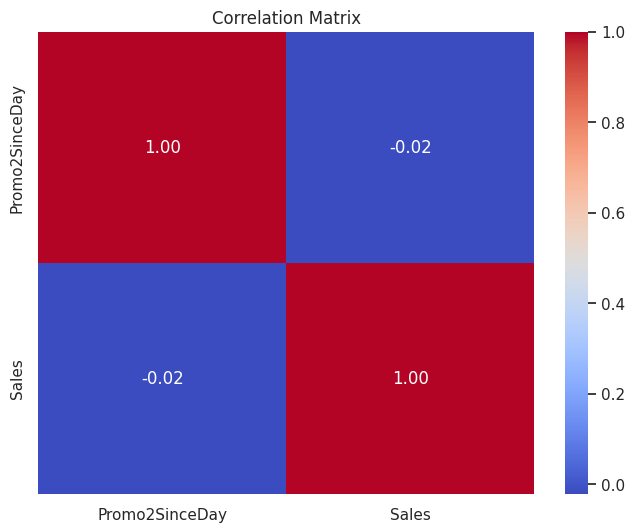

In [ ]:
import seaborn as sns

# Select the variables for correlation matrix
variables = ['Promo2SinceDay', 'Sales']

# Create a subset DataFrame with the selected variables
subset_df = df_temp2[variables]

# Compute the correlation matrix
corr_matrix = subset_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#### Chart - 4 Multiclass variables vs Sales

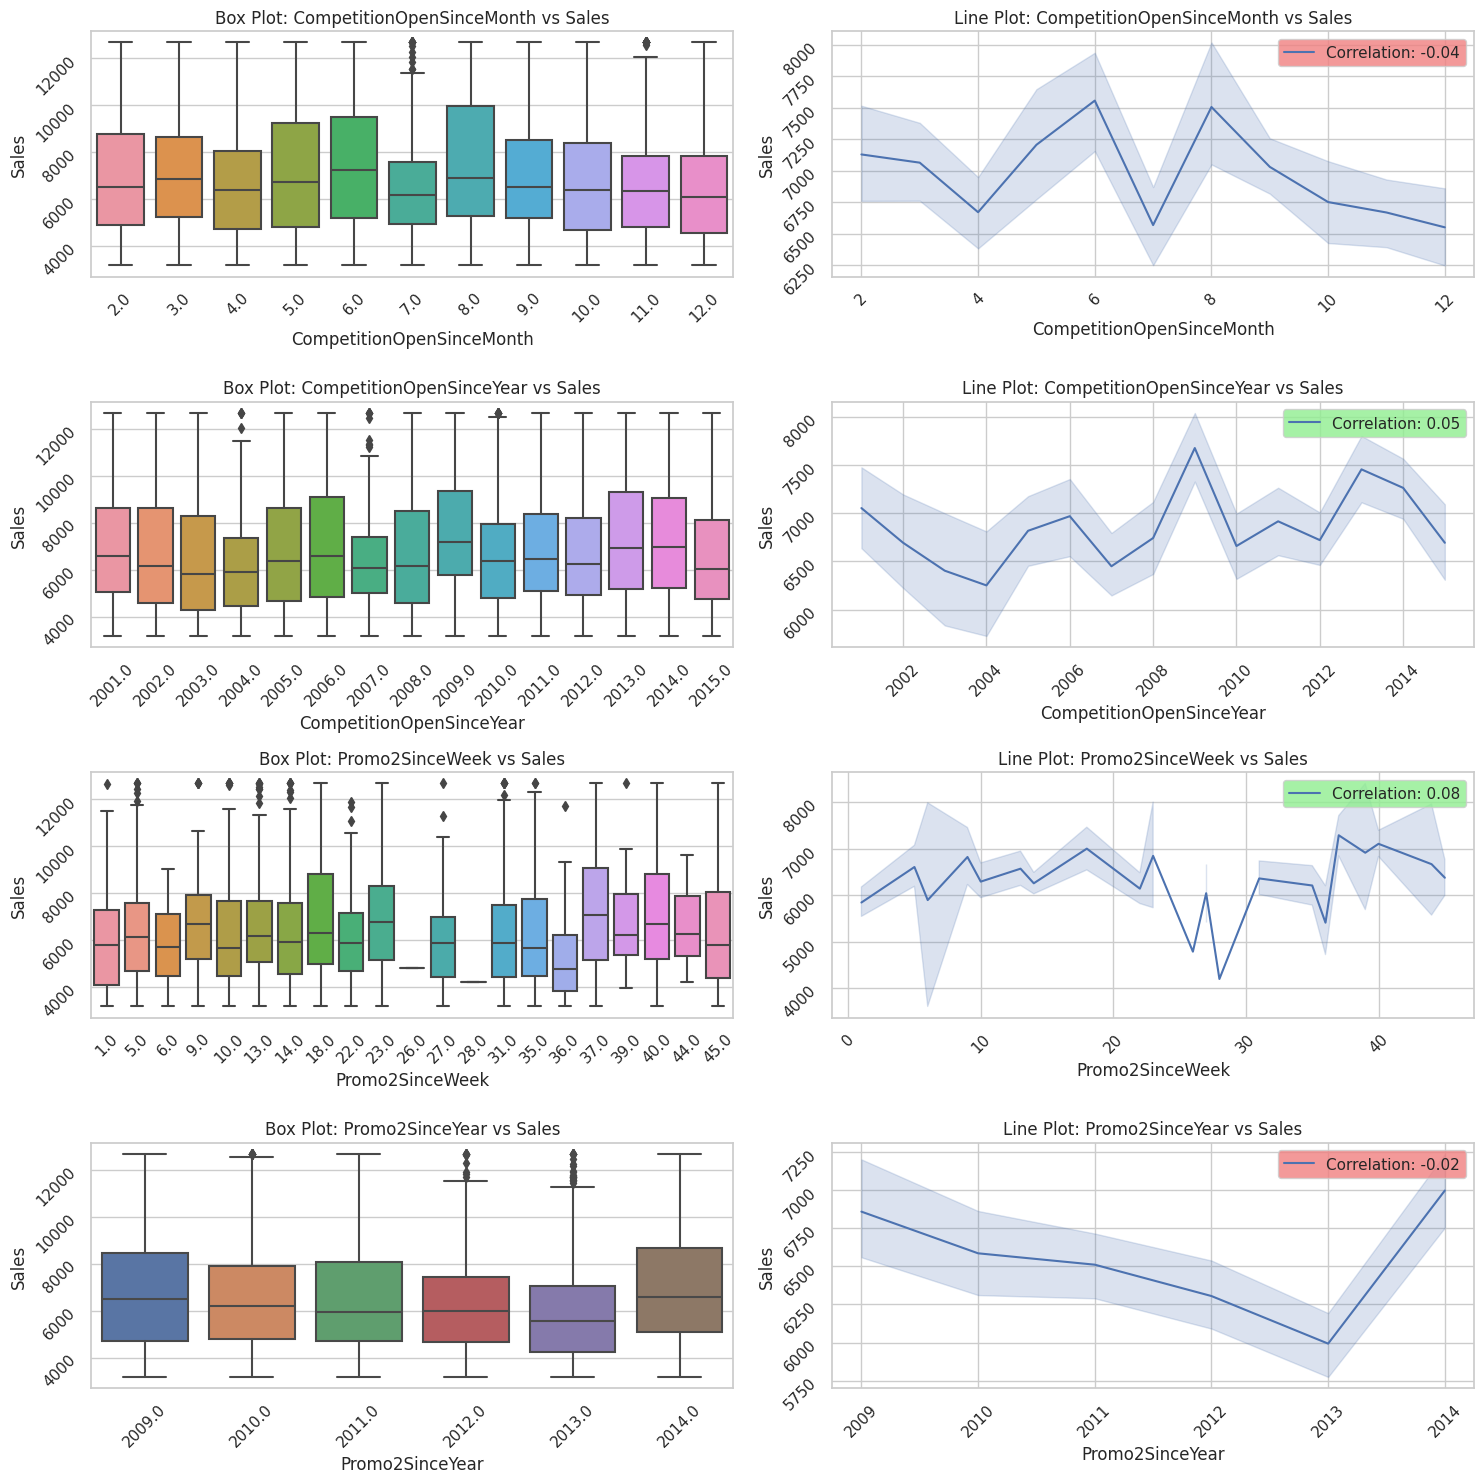

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

multiclass = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
dataframe = cap_outliers(df_m2.reset_index(drop=True).copy())
target = 'Sales'

fig, axes = plt.subplots(len(multiclass), 2, figsize=(15, 15))
sns.set(style='whitegrid')

for i, feature in enumerate(multiclass):
    sample_data = dataframe.sample(n=int(len(dataframe)*0.005), random_state=42)

    sns.boxplot(x=feature, y=target, data=sample_data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot: {feature} vs {target}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel(target)
    axes[i, 0].tick_params(rotation=45)

    sns.lineplot(x=feature, y=target, data=sample_data, ax=axes[i, 1])
    axes[i, 1].set_title(f'Line Plot: {feature} vs {target}')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel(target)
    axes[i, 1].tick_params(rotation=45)

    # Calculate correlation coefficient
    correlation = sample_data[feature].corr(sample_data[target])

    # Set color based on correlation sign
    color = 'lightgreen' if correlation >= 0 else 'lightcoral'

    # Add correlation value as a legend with color
    axes[i, 1].legend([f'Correlation: {correlation:.2f}'], facecolor=color)

plt.tight_layout()
plt.show()


In [ ]:
category_columns = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']

for column in category_columns:
    median_sales = df_m.groupby(column)['Sales'].median()
    print(f"Median Sales by {column}:")
    print(median_sales)
    print()




Median Sales by CompetitionOpenSinceMonth:
CompetitionOpenSinceMonth
1.0     5946.5
2.0     5386.5
3.0     5954.5
4.0     5841.0
5.0     5772.0
6.0     6404.0
7.0     5609.0
8.0     6236.0
9.0     5707.0
10.0    5602.0
11.0    5408.0
12.0    5655.5
Name: Sales, dtype: float64

Median Sales by CompetitionOpenSinceYear:
CompetitionOpenSinceYear
1900.0    7553.5
1961.0    6888.0
1990.0    6258.0
1994.0    6258.0
1995.0    6581.5
1998.0    6562.5
1999.0    4683.5
2000.0    6732.0
2001.0    5083.0
2002.0    5415.0
2003.0    5573.0
2004.0    5349.5
2005.0    5541.0
2006.0    5249.0
2007.0    5472.0
2008.0    5369.0
2009.0    6155.5
2010.0    5848.0
2011.0    5723.5
2012.0    5866.0
2013.0    6166.0
2014.0    6048.0
2015.0    5572.5
Name: Sales, dtype: float64

Median Sales by Promo2SinceWeek:
Promo2SinceWeek
1.0     5071.0
5.0     5166.0
6.0     4624.5
9.0     5606.0
10.0    5400.5
13.0    5457.0
14.0    5305.0
18.0    5760.0
22.0    5464.0
23.0    6186.5
26.0    5411.5
27.0    5169.5
28.0  

##### 1. Why did you pick the specific chart?

- A line plot, is a graphical representation of data points connected by straight lines. It is commonly used to show the relationship between two continuous variables or to display the change in a variable over time.

##### 2. What is/are the insight(s) found from the chart?

- There is a negative correlation between 'DayOfWeek' and 'Sales'.
- Competition since month has a slight negative correlation with sales.
- Promo2 since week has a slight positive correlation with sales.

Based on the provided median sales data for each category, the following insights can be derived:

1. Median Sales by CompetitionOpenSinceMonth:
   - The highest median sales are observed in June (6.0) with a value of 6,404.0, indicating that stores that opened in June tend to have higher sales compared to other months.
   - The lowest median sales are observed in February (2.0) with a value of 5,386.5, suggesting that stores that opened in February tend to have relatively lower sales.

2. Median Sales by CompetitionOpenSinceYear:
   - The highest median sales are observed for stores that opened in the year 1900 with a value of 7,553.5. However, this value seems anomalous, as the year 1900 is significantly earlier than the other years in the dataset.
   - Among the years in the dataset, stores that opened in 2000 have the highest median sales with a value of 6,732.0.
   - There is a range of median sales across different years, indicating that the year of competition opening can have an impact on sales performance.

3. Median Sales by Promo2SinceWeek:
   - The median sales vary across different weeks of Promo2 activation.
   - Week 48 has the highest median sales with a value of 6,784.0, while Week 6 has the lowest median sales with a value of 4,624.5.
   - The varying median sales suggest that the timing of Promo2 activation can influence the sales performance of stores.

4. Median Sales by Promo2SinceYear:
   - The median sales vary across different years of Promo2 activation.
   - Stores that activated Promo2 in 2009 have the highest median sales with a value of 5,847.0, followed closely by stores that activated Promo2 in 2010 with a median sales value of 5,588.0.
   - The median sales seem to fluctuate across the different years, indicating that the year of Promo2 activation can impact sales performance.

These insights provide an understanding of the relationship between the categorical variables (competition opening month/year, Promo2 activation week/year) and the median sales. Further analysis and context about the specific factors influencing sales, such as marketing strategies, competitive landscape, and external market conditions, would be necessary to make more informed decisions and develop strategies to optimize sales performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
df_m2.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

#### Chart - 5 Sales Volume and Median Sales by Month

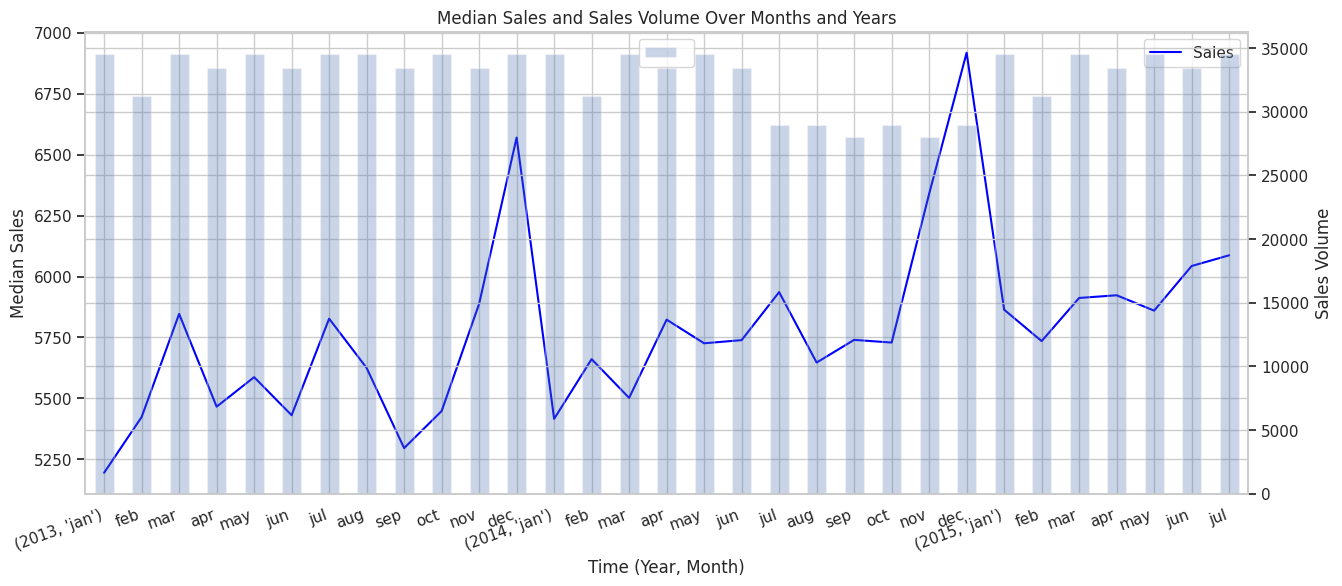

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the dataframe
df_temp = df_m.copy()

# Extract year and month from the Date
df_temp['year'] = pd.to_datetime(df_temp['Date']).dt.year
df_temp['month'] = pd.to_datetime(df_temp['Date']).dt.month

# Group by year, month and find the median of Sales
sales_data = df_temp.groupby(['year', 'month']).Sales.median()

# Find sales volume
sales_volume = df_temp.groupby(['year', 'month']).size()

fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot median sales as a line plot
sales_data.plot(kind='line', ax=ax1, color='blue', legend=True)

# Create another y-axis for sales volume
ax2 = ax1.twinx()
sales_volume.plot(kind='bar', ax=ax2, alpha=0.3, legend=True)

ax1.set_title('Median Sales and Sales Volume Over Months and Years')
ax1.set_xlabel('Time (Year, Month)')
ax1.set_ylabel('Median Sales')
ax2.set_ylabel('Sales Volume')

# Make new labels for x-axis where only the first occurrence of each year is labeled
labels = [(2013,'jan'),('feb'),('mar'),('apr'),('may'),('jun'),('jul'),('aug'),('sep'),('oct'),('nov'),('dec'),
          (2014,'jan'),('feb'),('mar'),('apr'),('may'),('jun'),('jul'),('aug'),('sep'),('oct'),('nov'),('dec'),
          (2015,'jan'),('feb'),('mar'),('apr'),('may'),('jun'),('jul')]



ax1.set_xticks(range(len(labels)))
ax2.set_xticks(range(len(labels))) # set xticks for ax2 as well

# Set labels for both axis after the plots are created
ax1.set_xticklabels(labels, rotation=20, ha='right')
ax2.set_xticklabels(labels, rotation=20, ha='right')

plt.show()


##### 1. Why did you pick the specific chart?

 A line plot helps us to visualize the relationship between two continuous variables or to display the change in a variable over time.

##### 2. What is/are the insight(s) found from the chart?

Seasonal Sales Trend: There seems to be a noticeable seasonal pattern in sales, with peaks occurring in December and lower points during the early months of the year. This suggests a possible relationship between sales and the holiday season.

Increasing Sales Volume: The sales volume, represented by the "Sales_Volume" data, shows a general increasing trend over time. This suggests that the number of sales transactions has been growing steadily.

Sales Fluctuations: While the sales volume exhibits a consistent upward trend, the actual sales figures show some fluctuations from month to month. These fluctuations may be influenced by various factors, such as promotions, external events, or changes in customer behavior.

Strong Sales in 2014: There is a noticeable increase in sales during 2014 compared to the preceding and subsequent years. This could indicate a period of significant growth or successful marketing initiatives during that year.

Correlation between Sales and Sales Volume: There appears to be a positive correlation between sales and sales volume, as the general trend of increasing sales volume aligns with the overall pattern of sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 This could indicate a period of significant growth or successful marketing initiatives during that year.

In [ ]:
df_m2.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

#### Chart - 6 Median Sales by Store Type/Assortment Over Year and Month

In [ ]:
df_m.columns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the dataframe
df_temp = df_m.copy()

# Extract year and month from the Date
df_temp['year'] = pd.to_datetime(df_temp['Date']).dt.year
df_temp['month'] = pd.to_datetime(df_temp['Date']).dt.month

# Group by year, month and StoreType, then find the median of Sales
sales_data = df_temp[['Sales','StoreType','year', 'month']].groupby(['year', 'month','StoreType']).median()

# Reshape the data for plotting
sales_data = sales_data.unstack(level='StoreType')

# Plotting
sales_data.plot(figsize=(10, 6))

plt.title('Median Sales by Store Type Over Year and Month')
plt.xlabel('Time (Year, Month)')
plt.ylabel('Median Sales')
plt.show()

##--------------------------------------------------------------------------------------------------##

# Group by year, month and StoreType, then find the median of Sales
sales_data = df_temp[['Sales','Assortment','year', 'month']].groupby(['year', 'month','Assortment']).median()

# Reshape the data for plotting
sales_data = sales_data.unstack(level='Assortment')

# Plotting
sales_data.plot(figsize=(10, 6))

plt.title('Median Sales by Assortment Over Year and Month')
plt.xlabel('Time (Year, Month)')
plt.ylabel('Median Sales')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 Median Sales with/without Promo/Promo2 Over Year and Month

In [ ]:
# Chart - 7 visualization code'Promo',

# Create a copy of the dataframe
df_temp = df_m.copy()

# Extract year and month from the Date
df_temp['year'] = pd.to_datetime(df_temp['Date']).dt.year
df_temp['month'] = pd.to_datetime(df_temp['Date']).dt.month

# Group by year, month and StoreType, then find the median of Sales
sales_data = df_temp[['Sales','Promo', 'month','year']].groupby(['year', 'month','Promo']).median()

# Reshape the data for plotting
sales_data = sales_data.unstack(level='Promo')

# Plotting
sales_data.plot(figsize=(10, 6))

plt.title('Median Sales with/without Promo Over Year and Month')
plt.xlabel('Time (Year, Month)')
plt.ylabel('Median Sales')
plt.show()

#---------------------------------------------------------------------------------------------#

# Group by year, month and StoreType, then find the median of Sales
sales_data = df_temp[['Sales','Promo2', 'month','year']].groupby(['year', 'month','Promo2']).median()

# Reshape the data for plotting
sales_data = sales_data.unstack(level='Promo2')

# Plotting
sales_data.plot(figsize=(10, 6))

plt.title('Median Sales with/without Promo2 Over Year and Month')
plt.xlabel('Time (Year, Month)')
plt.ylabel('Median Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# plot correlation matrix, specify image size
corr_matrix = df_m2.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',square=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1: The presence of a promotion (Promo) has a positive impact on sales

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis - H0: The presence of a promotion (Promo) has no significant impact on sales.
- Alternate Hypothesis - HA: The presence of a promotion (Promo) has an impact on sales.

#### 2. Perform an appropriate statistical test.

In [27]:
import scipy.stats as stats

# Seperate the data into two groups
promo_true = df_m2[df_m2['Promo'] == 1]
promo_false = df_m2[df_m2['Promo'] == 0]

# Perform Statistical Test to obtain P-Value
t_stat, p_value = stats.ttest_ind(promo_true['Sales'],promo_false['Sales'], axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
print('t-stat:', t_stat)
print('p-value:', p_value)

# Compare p-value with significance level (0.05)
if p_value < 0.05:
    conclusion = "Reject null hypothesis. The presence of a promotion (Promo) has an impact on sales."
else:
    conclusion = "Fail to reject null hypothesis. The presence of a promotion (Promo) has no significant impact on sales."

print(conclusion)


t-stat: 363.8446754265649
p-value: 0.0
Reject null hypothesis. The presence of a promotion (Promo) has an impact on sales.


##### Which statistical test have you done to obtain P-Value?, Why did you choose the specific statistical test?

The independent t-test, also called the two sample t-test, independent-samples t-test or student's t-test, is an inferential statistical test that determines whether there is a statistically significant difference between the means in two unrelated groups. [_Reference_](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php)



##### Insights from the Hypothesis Testing

- The t-statistic value (t=363.84) indicates the magnitude of the difference between the means of the two groups. A higher absolute value of the t-statistic indicates a larger difference between the means.

- The t-test results produced a very low p-value (P-Value=0.0), which means we can safely reject null hypothesis. This suggests there is a significant difference in sales between the days when there is a promotion (Promo = 1) and the days when there is no promotion (Promo = 0).



### Hypothetical Statement - 2: There is a significant difference in sales between different store types.

#### Hypothesis:

Null hypothesis (H0): There is no significant difference in sales between different store types.\
Alternative hypothesis (H1): There is a significant difference in sales between different store types.

#### 2. Perform an appropriate statistical test.

In [28]:
df_m2.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [29]:
df_m2['StoreType'].value_counts()

a    457077
d    258774
c    112978
b     15563
Name: StoreType, dtype: int64

In [30]:
# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(
  df_m2['Sales'][df_m2.StoreType =='a'],
  df_m2['Sales'][df_m2.StoreType =='b'],
  df_m2['Sales'][df_m2.StoreType =='c'],
  df_m2['Sales'][df_m2.StoreType =='d']
                                    )

print('f-statistic:', f_statistic)
print('p-value:', p_value)

# Compare p-value with significance level (0.05)
if p_value < 0.05:
    conclusion = "Reject null hypothesis. There is a significant difference in sales between different store types."
else:
    conclusion = "Fail to reject null hypothesis. There is no significant difference in sales between different store types."

print(conclusion)

f-statistic: 6081.815606141819
p-value: 0.0
Reject null hypothesis. There is a significant difference in sales between different store types.


##### Which statistical test have you done to obtain P-Value?, Why did you choose the specific statistical test?

ANOVA is a statistical test used to compare the means of two or more groups to determine if there are significant differences between them. In this case, the different store types are treated as the groups, and the sales data is compared to see if there are significant variations among the groups.\
By choosing the ANOVA test, we can compare the means of multiple store types simultaneously, rather than conducting pairwise comparisons between each pair of store types.

##### Insights from the Hypothesis Testing

The F-statistic (F = 6081) is a measure of the ratio of the variance between groups to the variance within groups. A higher F-statistic suggests a larger difference between the group means relative to the variability within each group.

A p-value below a certain threshold (commonly 0.05) indicates that the observed differences are unlikely to be due to random chance, hence in this case(p=0.0) we can reject the null hypothesis.

### Hypothetical Statement - 3: There is a significant difference in sales on different days of the week.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis:

Null hypothesis (H0): There is no significant difference in sales on different days of the week.\
Alternative hypothesis (H1): There is a significant difference in sales on different days of the week.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(
    df_m2[df_m2['DayOfWeek'] == 1]['Sales'],
    df_m2[df_m2['DayOfWeek'] == 2]['Sales'],
    df_m2[df_m2['DayOfWeek'] == 3]['Sales'],
    df_m2[df_m2['DayOfWeek'] == 4]['Sales'],
    df_m2[df_m2['DayOfWeek'] == 5]['Sales'],
    df_m2[df_m2['DayOfWeek'] == 6]['Sales'],
    df_m2[df_m2['DayOfWeek'] == 7]['Sales']
)

print('f-statistic:', f_statistic)
print('p-value:', p_value)
# Compare p-value with significance level (0.05)
if p_value < 0.05:
    conclusion = "Reject null hypothesis. There is a significant difference in sales on different days of the week."
else:
    conclusion = "Fail to reject null hypothesis. There is no significant difference in sales on different days of the week."

print(conclusion)

f-statistic: 7451.355360587356
p-value: 0.0
Reject null hypothesis. There is a significant difference in sales on different days of the week.


##### Insights from the Hypothesis Testing

 The large F-statistic suggests (F = 7451) a large difference between the group means relative to the variability within each group.

The p-value (p=0.0) indicates that the observed differences are unlikely to be due to random chance, hence in this case(p=0.0) we can reject the null hypothesis.
ie, there is a significant difference in sales on different days of the week.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### 1.1 First Let's identify the rows with missing values in the competition distance.

In [30]:
df_m2.shape

(844392, 16)

In [31]:
df_m2[np.isnan(df_m2['CompetitionDistance'])].isna().sum()

DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
StoreType                       0
Assortment                      0
CompetitionDistance          2186
CompetitionOpenSinceMonth    2186
CompetitionOpenSinceYear     2186
Promo2                          0
Promo2SinceWeek              1564
Promo2SinceYear              1564
PromoInterval                1564
dtype: int64

- We can assume the rows with missing values in the competition distance have no competition. Hence we can fill the rows with competition details with a value outside the range.

In [32]:
# calculating max value of competition date
df_temp = df_m2.dropna().copy()
pd.to_datetime(
   df_temp['CompetitionOpenSinceYear'].astype(int).astype(str) + '-' +
   df_temp['CompetitionOpenSinceMonth'].astype(int).astype(str) + '-1'
).max()

Timestamp('2015-08-01 00:00:00')

In [33]:
# calculating max value of competition distance
df_temp['CompetitionDistance'].max()

27190.0

In [34]:
# Create a copy of the original DataFrame
df_c1 = df_m2.copy()

# Specify the columns to impute
columns_to_impute = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']

# Identify the rows where CompetitionDistance is missing
condition = df_c1['CompetitionDistance'].isnull()

# Update the specified columns with a value outside the range for the rows satisfying the condition
df_c1.loc[condition,'CompetitionDistance'] = 40000
df_c1.loc[condition,'CompetitionOpenSinceMonth'] = 12
df_c1.loc[condition,'CompetitionOpenSinceYear'] = 2016


#### 1.2 Lets impute the remaining missing values with either mode or median

In [35]:

columns_to_impute_median = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
columns_to_impute_mode = ['PromoInterval','Promo2']

df_c1_imputed = df_c1.copy()
for column in columns_to_impute_mode:
    df_c1_imputed[column].fillna(df_c1_imputed[column].mode()[0], inplace=True)


for column in columns_to_impute_median:
    df_c1_imputed[column].fillna(df_c1_imputed[column].median(), inplace=True)


In [36]:
df_c1_imputed.shape

(844392, 16)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [37]:
# Handling Outliers & Outlier treatments
def cap_outliers(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    cleaned_df = df.copy()

    # Iterate over numerical columns
    for column in cleaned_df.select_dtypes(include=np.number):
        # Calculate the 99th percentile value
        upper_cap_value = cleaned_df[column].quantile(0.99)
        #lower_cap_value = cleaned_df[column].quantile(0.05)

        # Cap outliers to the 99th percentile value
        cleaned_df[column] = np.where(cleaned_df[column] > upper_cap_value, upper_cap_value, cleaned_df[column])
        #cleaned_df[column] = np.where(cleaned_df[column] < lower_cap_value, lower_cap_value, cleaned_df[column])

    return cleaned_df
df_c1_capped = cap_outliers(df_c1_imputed)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 1.1 Create new features from `Date` column

In [38]:
# Manipulate Features to minimize feature correlation and create new features
df_c1_capped['week_number'] = (df_c1_capped['Date']).dt.week
df_c1_capped['month'] = (df_c1_capped['Date']).dt.month
df_c1_capped['year'] = (df_c1_capped['Date']).dt.year
#df_c1_capped.drop(['Date','Customers'], axis=1, inplace=True)#,'Customers'

#### 1.2 Create new feature `IsPromoMonth`

In [39]:
# Detect whether promo ran in the current month
df_c1_capped['IsPromoMonth'] = df_c1_capped.apply(lambda row: 1 if row['Date'].strftime('%b') in row['PromoInterval'] else 0, axis=1)
df_c1_capped['IsPromoMonth'].sample(5)

Store
379    0
928    1
863    0
93     0
824    0
Name: IsPromoMonth, dtype: int64

#### 1.3 Create new features `Av_sales/Assorment/StoreType/Month` and `Av_customers/Assorment/StoreType/Month`

In [40]:
describe_1 = df_c1_capped.groupby(['StoreType','Assortment','month'])['Sales'].mean().reset_index()
describe_1.rename(columns={'Sales':'Av_sales/Assorment/StoreType/Month'}, inplace=True)
describe_1.sample(5)

,StoreType,Assortment,month,Av_sales/Assorment/StoreType/Month
93,c,b,10,NaN
58,b,b,11,9122.584314
47,b,a,12,11214.785714
43,b,a,8,10000.059908
44,b,a,9,10093.909524


In [41]:
describe_2 = df_c1_capped.groupby(['StoreType','Assortment','month'])['Customers'].mean().reset_index()
describe_2.rename(columns={'Customers':'Av_customers/Assorment/StoreType/Month'}, inplace=True)
describe_2.sample(5)

,StoreType,Assortment,month,Av_customers/Assorment/StoreType/Month
9,a,a,10,752.378148
58,b,b,11,1881.566667
90,c,b,7,NaN
112,d,a,5,601.800110
53,b,b,6,1919.938272


In [42]:
describe =describe_1.join(describe_2['Av_customers/Assorment/StoreType/Month'])
describe.dropna(inplace=True)
print(describe.shape)
describe.sample(5)

(108, 5)


,StoreType,Assortment,month,Av_sales/Assorment/StoreType/Month,Av_customers/Assorment/StoreType/Month
5,a,a,6,6561.175032,754.038698
36,b,a,1,10192.443548,1557.845161
10,a,a,11,6699.783083,773.817898
39,b,a,4,10758.853333,1641.665000
116,d,a,9,6015.266727,563.805951


In [43]:
df_c2_capped = df_c1_capped.merge(describe, on=['StoreType', 'Assortment', 'month'])
print(df_c2_capped.shape)
df_c2_capped.sample(5)

(844392, 22)


,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,week_number,month,year,IsPromoMonth,Av_sales/Assorment/StoreType/Month,Av_customers/Assorment/StoreType/Month
761708,4.0,2013-09-12,6524.0,715.0,1.0,0,0.0,c,c,5260.0,...,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",37,9,2013,0,6541.523521,758.952092
333362,1.0,2014-03-10,3408.0,526.0,0.0,0,0.0,c,a,1200.0,...,1.0,14.0,2011.0,"Jan,Apr,Jul,Oct",11,3,2014,0,6861.110395,843.119213
710190,2.0,2014-10-28,7314.0,689.0,0.0,0,1.0,a,c,15710.0,...,1.0,37.0,2009.0,"Jan,Apr,Jul,Oct",44,10,2014,1,7101.455214,828.945396
147526,5.0,2013-06-28,4501.0,367.0,0.0,0,0.0,d,a,2380.0,...,1.0,40.0,2014.0,"Jan,Apr,Jul,Oct",26,6,2013,0,6546.864879,585.274178
33616,4.0,2013-07-04,7039.0,711.0,1.0,0,0.0,a,a,3440.0,...,1.0,45.0,2009.0,"Feb,May,Aug,Nov",27,7,2013,0,6479.198718,744.198753


#### 1.4 Convert competition Distance to binned values

In [44]:
df_c2_capped['CompetitionDistanceBin'] = pd.cut(df_c2_capped['CompetitionDistance'], 6, labels=['1','2','3','4','5','6'])

#### 1.5 Create new feature `CompetitionOpenSinceDay`

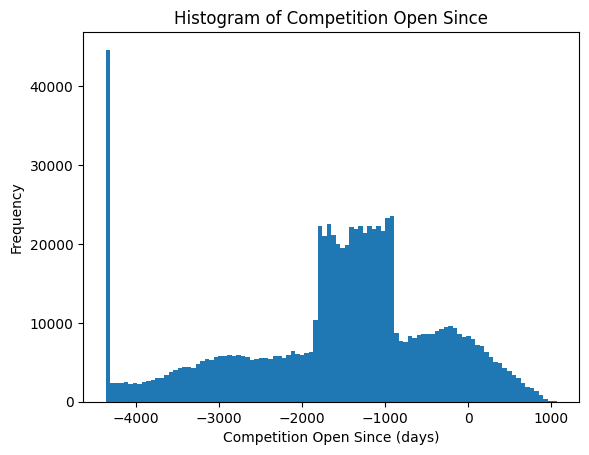

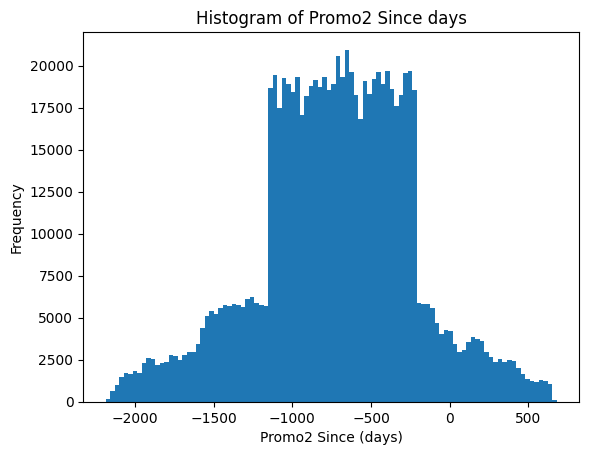

In [45]:
import pandas as pd
df_temp = df_c2_capped.copy()
df_temp['Date'] = pd.to_datetime(df_temp['Date'])


df_temp.dropna(inplace=True)
df_temp['CompetitionOpenSinceDay'] = (pd.to_datetime(
    df_temp['CompetitionOpenSinceYear'].astype(int).astype(str) + '-' +
    df_temp['CompetitionOpenSinceMonth'].astype(int).astype(str) + '-1'
)-df_temp['Date']).dt.days
#--------------------------------

upper_cap = df_temp['CompetitionOpenSinceDay'].quantile(0.95)
lower_cap = df_temp['CompetitionOpenSinceDay'].quantile(0.05)

df_temp2 = df_temp.copy()
# reaplace outliers with capped value
df_temp2['CompetitionOpenSinceDay'] = np.where(df_temp['CompetitionOpenSinceDay'] > upper_cap, upper_cap, df_temp['CompetitionOpenSinceDay'])
df_temp2['CompetitionOpenSinceDay'] = np.where(df_temp['CompetitionOpenSinceDay'] < lower_cap, lower_cap, df_temp['CompetitionOpenSinceDay'])

# Plot histogram
plt.hist(df_temp2['CompetitionOpenSinceDay'], bins=100)
plt.xlabel('Competition Open Since (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Competition Open Since')
plt.show()

#--------------------------------------------------------------------

df_temp2['Promo2SinceWeek'] = df_temp2['Promo2SinceWeek'].astype(int)
df_temp2['Promo2SinceYear'] = df_temp2['Promo2SinceYear'].astype(int)

df_temp2['Promo2SinceDay'] = (pd.to_datetime(df_temp2['Promo2SinceYear'].astype(str), format='%Y') + \
                             pd.to_timedelta(df_temp2['Promo2SinceWeek'] * 7, unit='days')-df_temp2['Date']).dt.days

                             # Plot histogram
plt.hist(df_temp2['Promo2SinceDay'], bins=100)
plt.xlabel('Promo2 Since (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Promo2 Since days')
plt.show()

df_c3_capped = df_temp2.copy()


### 4. Categorical Encoding

In [46]:
# Encode your categorical columns
  # Separate features and target
cols_to_drop = ['Sales','Date']
target_col = ['Sales']
X = df_c3_capped.drop(cols_to_drop, axis=1)
y = df_c3_capped[target_col]

# Perform one-hot encoding for features
X_encoded = pd.get_dummies(X)


In [47]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   DayOfWeek                               844392 non-null  float64
 1   Customers                               844392 non-null  float64
 2   Promo                                   844392 non-null  float64
 3   SchoolHoliday                           844392 non-null  float64
 4   CompetitionDistance                     844392 non-null  float64
 5   CompetitionOpenSinceMonth               844392 non-null  float64
 6   CompetitionOpenSinceYear                844392 non-null  float64
 7   Promo2                                  844392 non-null  float64
 8   Promo2SinceWeek                         844392 non-null  int64  
 9   Promo2SinceYear                         844392 non-null  int64  
 10  week_number                             8443

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 2. Feature Selection

In [48]:
# Select your features wisely to avoid overfitting
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

def calculate_vif(df):
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])

    # Replace infinite values with NaN
    #numerical_columns.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with NaN values
    #numerical_columns.dropna(inplace=True)

    # Remove duplicates
    #numerical_columns = numerical_columns.loc[:,~numerical_columns.columns.duplicated()]

    # Create a DataFrame to store VIF results
    vif_data = pd.DataFrame()
    vif_data['Variable'] = numerical_columns.columns
    vif_data['VIF'] = [vif(numerical_columns.values, i) for i in range(numerical_columns.shape[1])]

    return vif_data.sort_values(by='VIF', ascending=False)

calculate_vif(X_encoded.drop(['year','Promo2SinceYear','Av_sales/Assorment/StoreType/Month','Customers','CompetitionOpenSinceYear','month'], axis=1))

,Variable,VIF
9,Av_customers/Assorment/StoreType/Month,11.859370
4,CompetitionOpenSinceMonth,7.234851
6,Promo2SinceWeek,5.574444
0,DayOfWeek,5.100097
7,week_number,3.721080
11,Promo2SinceDay,3.181105
10,CompetitionOpenSinceDay,2.695049
5,Promo2,1.998362
1,Promo,1.871458
8,IsPromoMonth,1.564816


In [49]:
from sklearn.feature_selection import SelectKBest, f_classif


# Select top 25 features based on their ANOVA F-value
selector = SelectKBest(f_classif, k=25)
X = X_encoded.drop(['year','Promo2SinceYear','Av_sales/Assorment/StoreType/Month','Customers','CompetitionOpenSinceYear','month'], axis=1).copy()
y = y
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].to_list()

print('Selected features:')
print(selected_features)

Selected features:
['DayOfWeek', 'Promo', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2', 'Promo2SinceWeek', 'week_number', 'Av_customers/Assorment/StoreType/Month', 'CompetitionOpenSinceDay', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b', 'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec', 'CompetitionDistanceBin_1', 'CompetitionDistanceBin_4', 'CompetitionDistanceBin_5', 'CompetitionDistanceBin_6']


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [50]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 7. Data Splitting

We'll select a test set from our dataset that is 6 weeks long for evaluating our model on unseen data

In [51]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split the dataset into training and testing sets
#X = X_encoded.drop(['year','Promo2SinceYear','Av_sales/Assorment/StoreType/Month'
#                    ,'Customers','CompetitionOpenSinceYear','month'], axis=1).copy()
# X = X_encoded[selected_features]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# We'll select a test set from our dataset that is 6 weeks long for evaluating our model on unseen data
df_c3_capped['Date'].describe()

df_c1_train_val = df_c3_capped[df_c2_capped['Date'] < (pd.to_datetime('2015-07-31') - pd.to_timedelta(42, unit='d'))]
df_c1_test = df_c3_capped[df_c2_capped['Date'] >= (pd.to_datetime('2015-07-31') - pd.to_timedelta(42, unit='d'))]

cols_to_drop = ['Sales','Date']
target_col = ['Sales']

# Select features and target for training, validation and testing
X_train_val = df_c1_train_val.drop(cols_to_drop, axis=1)
y_train_val = df_c1_train_val[target_col]

X_test = df_c1_test.drop(cols_to_drop, axis=1)
y_test = df_c1_test[target_col]

In [52]:
test_size_perc = len(df_c1_test)/len(df_c1_train_val)*100
print(f'allocated percentage for test set: {test_size_perc:.2f}%')

allocated percentage for test set: 5.16%


In [53]:
X_train_val_selected = pd.get_dummies(X_train_val)[selected_features]
X_test = pd.get_dummies(X_test)[selected_features]

X_train, X_val, y_train, y_val = train_test_split(X_train_val_selected, y_train_val, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [54]:
# Transform Your data
# Apply square root transformation to y_train and y_test
y_train_s = np.sqrt(y_train)
y_val_s = np.sqrt(y_val)
y_test_s = np.sqrt(y_test)

### 8. Data Scaling

In [55]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_s = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test_s = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

##### Which method have you used to scale you data and why?

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [56]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

To find the optimum models for out dataset, we will train and and compare the evaluation metrics of multiple models at once.  

In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Define models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regression', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting Regression', GradientBoostingRegressor(random_state=42)),
    ('XGBoost Regression', XGBRegressor(random_state=42))
]




def Train_evaluate(models, X_train, y_train, X_val, y_val):
    """
    Train and evaluate regression models using different valuation metrics.

    Args:
        models (list): List of tuples containing the model names and model instances.
        X_train (array-like): Training data features.
        y_train (array-like): Training data targets.
        X_val (array-like): valuation data features.
        y_val (array-like): valuation data targets.

    Returns:
        Tuple (model, metrics_df): Trained model and metrics dataframe.
    """
    # Initialize lists to store the metrics
    metrics = []

    # Const numbers to calculate adjusted R-squared
    p_train = X_train.shape[1]
    n_train = y_train.shape[0]

    p_val = X_val.shape[1]
    n_val = y_val.shape[0]

    # Train and evaluate each model
    for name, model in models:
        # Fit and predict using the selected model


        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)

        # Evaluation metrics for train data
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)
        adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1)) / (n_train - p_train - 1)
        mape_train = (mae_train / np.mean(y_train)) * 100

        # Evaluation metrics for val data
        rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
        mae_val = mean_absolute_error(y_val, y_pred_val)
        r2_val = r2_score(y_val, y_pred_val)
        adjusted_r2_val = 1 - ((1 - r2_val) * (n_val - 1)) / (n_val - p_val - 1)
        mape_val = (mae_val / np.mean(y_val)) * 100

        # Append valuation metrics to metrics list
        metrics.append([
            name, rmse_train, mae_train, r2_train, adjusted_r2_train, mape_train[0],
            rmse_val, mae_val, r2_val, adjusted_r2_val, mape_val[0]
        ])

    # Create dataframe for metrics
    metrics_df = pd.DataFrame(
        metrics,
        columns=[
            'Model', 'RMSE Train', 'MAE Train', 'R-squared Train', 'Adjusted R-squared Train', 'MAPE Train',
            'RMSE val', 'MAE val', 'R-squared val', 'Adjusted R-squared val', 'MAPE val'
        ]
    )

    # Format numeric columns
    metrics_df = metrics_df.round(2)

    return metrics_df,model

In [ ]:
metrics_history,_ = Train_evaluate(models, X_train_s, y_train_s, X_val_s, y_val_s)
metrics_history

,Model,RMSE Train,MAE Train,R-squared Train,Adjusted R-squared Train,MAPE Train,RMSE val,MAE val,R-squared val,Adjusted R-squared val,MAPE val
0,Linear Regression,2577.22,1945.24,0.25,0.25,28.10,2588.24,1954.62,0.24,0.24,28.20
1,Decision Tree Regression,187.81,21.94,1.00,1.00,0.32,1314.48,850.74,0.81,0.81,12.28
2,Random Forest Regression,413.07,257.38,0.98,0.98,3.72,1032.59,673.07,0.88,0.88,9.71
3,Gradient Boosting Regression,2315.62,1740.21,0.39,0.39,25.14,2324.19,1748.35,0.39,0.39,25.23
4,XGBoost Regression,1254.01,913.54,0.82,0.82,13.20,1265.48,923.69,0.82,0.82,13.33


Here linear regression is only able to explain 25% of variance in the target variable.
Since it fails to capture the complexity of the data, we will use the rest of the models for our following analysis.

### ML Model - 1 - **Decision Tree**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### **Decision Tree**
- A decision tree is a non-parametric supervised learning algorithm used for both classification and regression tasks. It has a hierarchical, tree-like structure consisting of a root node, branches, internal nodes, and leaf nodes

- In a decision tree, each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label or decision taken after computing all attributes. The paths from the root to the leaf nodes represent classification rules

- Decision trees are commonly used in operations research, decision analysis, and machine learning

In [ ]:
metrics_history[metrics_history['Model'] == 'Decision Tree Regression']

,Model,RMSE Train,MAE Train,R-squared Train,Adjusted R-squared Train,MAPE Train,RMSE val,MAE val,R-squared val,Adjusted R-squared val,MAPE val
1,Decision Tree Regression,187.81,21.94,1.0,1.0,0.32,1314.48,850.74,0.81,0.81,12.28


- The Decision Tree Regression model seems to overfit the training data indicated by the R-squared scores of 1.0 on the training set. The model performs reasonably well on validation data, suggested by R-squared scores of 0.82 on validation set

- Overall, the Decision Tree Regression model shows promising performance and can be improved by tuning hyperparameters.

#### 2. Cross- Validation & Hyperparameter Tuning

- Here I have used Optuna library for hyperparameter optimization for all the ML models.
- Optuna is a hyperparameter optimization software framework designed for machine learning. It allows users to implement different state-of-the-art optimization methods to perform hyperparameter optimization rapidly with great performance
- By default, optuna implements a Bayesian optimization - Tree-structured Parzen Estimator (TPE) algorithm. TPE constructs a probabilistic model to model the relationship between hyperparameters and the objective function, and then samples the hyperparameters based on this model to guide the search towards promising regions of the hyperparameter space.
- In the following code, the objective function defines the objective to be maximized, which is the R-squared score between the predicted and actual values. The trial object is used to sample hyperparameters from a specified search space

In [ ]:
import optuna
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor


def objective(trial):
    params = {
        'max_depth': 55, # Model performance increases with depth, also causes overfitting
        'min_samples_split': trial.suggest_int('min_samples_split', 4, 10), # Initial trial used 2,10 then narrowed to current value
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 9,18), # Initial trial used 1,10 then narrowed to current value
        'criterion': 'friedman_mse' # Eliminated {'poisson', 'absolute_error'}
    }

    model = DecisionTreeRegressor(**params)

    model.fit(X_train_s, y_train_s)
    val_r2 = model.score(X_val_s, y_val_s)
    print('Train r2 score: ', model.score(X_train_s, y_train_s))

    return val_r2

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

print('Best hyperparameters: ', study.best_trial.params)
print('Best r2 score: ', study.best_value)

[I 2023-06-26 19:59:50,859] A new study created in memory with name: no-name-7b297b7f-62da-4abf-8359-9053eb64756a
[I 2023-06-26 19:59:58,034] Trial 0 finished with value: 0.8601122382078442 and parameters: {'min_samples_split': 10, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.8601122382078442.


Train r2 score:  0.9009041256173346


[I 2023-06-26 20:00:04,238] Trial 1 finished with value: 0.8557687017308395 and parameters: {'min_samples_split': 5, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.8601122382078442.


Train r2 score:  0.8842432295394147


[I 2023-06-26 20:00:10,879] Trial 2 finished with value: 0.8568613560328062 and parameters: {'min_samples_split': 6, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.8601122382078442.


Train r2 score:  0.888184905939406


[I 2023-06-26 20:00:17,675] Trial 3 finished with value: 0.8568408065017679 and parameters: {'min_samples_split': 6, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.8601122382078442.


Train r2 score:  0.888184905939406


[I 2023-06-26 20:00:23,838] Trial 4 finished with value: 0.8563720385317916 and parameters: {'min_samples_split': 9, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.8601122382078442.


Train r2 score:  0.8860487418628153


[I 2023-06-26 20:00:30,940] Trial 5 finished with value: 0.8578784293800253 and parameters: {'min_samples_split': 6, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.8601122382078442.


Train r2 score:  0.890552948561796


[I 2023-06-26 20:00:36,861] Trial 6 finished with value: 0.8557758990999723 and parameters: {'min_samples_split': 5, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.8601122382078442.


Train r2 score:  0.8842432295394147


[I 2023-06-26 20:00:44,335] Trial 7 finished with value: 0.8591623353896136 and parameters: {'min_samples_split': 10, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.8601122382078442.


Train r2 score:  0.8952085386735106


[I 2023-06-26 20:00:50,233] Trial 8 finished with value: 0.8568428020967032 and parameters: {'min_samples_split': 9, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.8601122382078442.


Train r2 score:  0.888184905939406


[I 2023-06-26 20:00:57,471] Trial 9 finished with value: 0.8568553523656095 and parameters: {'min_samples_split': 6, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.8601122382078442.


Train r2 score:  0.888184905939406


[I 2023-06-26 20:01:03,574] Trial 10 finished with value: 0.8603605546848696 and parameters: {'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 10 with value: 0.8603605546848696.


Train r2 score:  0.9041173393023753


[I 2023-06-26 20:01:11,054] Trial 11 finished with value: 0.8603857555147538 and parameters: {'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 11 with value: 0.8603857555147538.


Train r2 score:  0.9041173393023753


[I 2023-06-26 20:01:17,170] Trial 12 finished with value: 0.8603029947659887 and parameters: {'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 11 with value: 0.8603857555147538.


Train r2 score:  0.9075111726531807


[I 2023-06-26 20:01:24,631] Trial 13 finished with value: 0.8602786823976765 and parameters: {'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 11 with value: 0.8603857555147538.


Train r2 score:  0.9075111726531807


[I 2023-06-26 20:01:30,664] Trial 14 finished with value: 0.8601034783329363 and parameters: {'min_samples_split': 8, 'min_samples_leaf': 11}. Best is trial 11 with value: 0.8603857555147538.


Train r2 score:  0.9009041256173346
Best hyperparameters:  {'min_samples_split': 8, 'min_samples_leaf': 10}
Best r2 score:  0.8603857555147538




| max_depth | min_samples_split | min_samples_leaf | criterion      | R2 Score     |
|----|------------------|-----------------|----------------|--------------|
| 65 | 9                | 10              | friedman_mse   | 0.860358     |
| 55 | 8                | 10              | friedman_mse   | 0.860386     |
| 45 | 4                | 10              | friedman_mse   | 0.860393     |
| 45 | 4                | 6               | friedman_mse   | 0.858035     |
| 35 | 5                | 5               | friedman_mse   | 0.856207     |
| 25 | 3                | 5               | friedman_mse   | 0.845925     |
| 15 | 3                | 4               | friedman_mse   | 0.643338     |


- As we can see from the above results, increasing the depth of the tree leads to higher optimized results, however increasing from n = 45 and higher leads to only marginal improvement.
- Hence we can conclude that the model coverges at hyperparameters `{'max_depth' = 45, min_samples_split = 4, min_samples_leaf = 10, and criterion = friedman_mse}`.
- We can stop the trial here since increasing the depth of the tree might lead to overfitting and increasing the model complexity.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Selected hyperparameters for Decision Tree Regression
params =  {'max_depth' : 45, 'min_samples_split' : 4, 'min_samples_leaf' : 10,'criterion' :'friedman_mse'}

# Use the best model to make predictions
models = [('Decision Tree Regression HPO', DecisionTreeRegressor(**params,random_state=42))]
metrics_df,_ = Train_evaluate(models, X_train, y_train, X_val, y_val)

# Save evaluation metrics to metrics_history
metrics_history = metrics_history.append(metrics_df)
metrics_history[(metrics_history['Model'] == 'Decision Tree Regression')
                | (metrics_history['Model'] == 'Decision Tree Regression HPO')]

,Model,RMSE Train,MAE Train,R-squared Train,Adjusted R-squared Train,MAPE Train,RMSE val,MAE val,R-squared val,Adjusted R-squared val,MAPE val
1,Decision Tree Regression,187.81,21.94,1.0,1.0,0.32,1314.48,850.74,0.81,0.81,12.28
0,Decision Tree Regression HPO,932.10,616.15,0.9,0.9,8.90,1138.78,754.43,0.85,0.85,10.89


- The HPO has lead to a more optimized results indicated by a lower R-squared score of 0.9 on the training set and a higher R-squared score of 0.86 on the validation set.
- The model is able to generalize better on unseen data after the hyperparameter tuning.

### ML Model - 2 - Random Forest

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### **sklearn.ensemble.RandomForestRegressor**

- Random forest is a machine learning algorithm that is used for classification and regression tasks. It is an ensemble learning method that combines multiple decision trees to make predictions. Each individual tree in the random forest produces a class prediction, and the final prediction is determined by majority voting.

- The random forest algorithm is known for its effectiveness and versatility. It can handle a wide range of data and requires little configuration. It is often used as a black box model in businesses because it generates reasonable predictions without much tuning.

In [ ]:
metrics_history[metrics_history['Model'] == 'Random Forest Regression']

,Model,RMSE Train,MAE Train,R-squared Train,Adjusted R-squared Train,MAPE Train,RMSE val,MAE val,R-squared val,Adjusted R-squared val,MAPE val
0,Random Forest Regression,413.07,257.38,0.98,0.98,3.72,1032.59,673.07,0.88,0.88,9.71


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators':100, #trial.suggest_int('n_estimators', 100, 200),
        'max_depth':trial.suggest_int('max_depth', 15, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 7),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf', 5, 10),
        'n_jobs': -1
    }

    model = RandomForestRegressor(**params)
    model.fit(X_train_s, y_train_s)
    val_r2 = model.score(X_val_s, y_val_s)
    print('Train r2 score: ', model.score(X_train_s, y_train_s))

    return val_r2

###--- Commenting out following code beacause HPO takes too long to run---###

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=25)

# print('Best hyperparameters: ', study.best_trial.params)
# print('Best r2 score: ', study.best_value)

###--- End of HPO for Random Forest Regression ---###


"\n###--- Commenting out following code beacause it takes too long to run---###\n\nstudy = optuna.create_study(direction='maximize')\n# Set n_jobs to -1 to enable parallel computations with GPU if available\nstudy.optimize(objective, n_trials=25, n_jobs=-1)\n\nprint('Best hyperparameters: ', study.best_trial.params)\nprint('Best r2 score: ', study.best_value)\n###--- End of HPO for Random Forest Regression ---###\n"

| `n_estimators` | `max_depth` | `min_samples_split` | `min_samples_leaf` | Best R-squared Score |
|-----------------|-------------|---------------------|--------------------|----------------------|
| 100             | 43          | 5                    | 5                  | 0.8840932266273452 |
| 50              | 24           | 7                    | 9                  | 0.8786926164161606 |
| 25              | 24          | 7                    | 3                  | 0.8411059028277121 |

These hyperparameters represent the best configurations found through the hyperparameter optimization process. The corresponding R-squared scores indicate the goodness of fit of the model using these hyperparameter settings.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Define models
params = { 'n_estimators':100,'max_depth': 43, 'min_samples_split': 5, 'min_samples_leaf': 5 }
 #{ 'n_estimators':100,'max_depth' : 45, 'min_samples_split' : 4, 'min_samples_leaf' : 10,'criterion' :'friedman_mse'}

models = [('Random Forest Regression HPO', RandomForestRegressor(**params,random_state=42))]
metrics_df,_ = Train_evaluate(models, X_train, y_train, X_val, y_val)


metrics_history = metrics_history.append(metrics_df)
metrics_history[(metrics_history['Model'] == 'Random Forest Regression')|
                (metrics_history['Model'] == 'Random Forest Regression HPO')]

,Model,RMSE Train,MAE Train,R-squared Train,Adjusted R-squared Train,MAPE Train,RMSE val,MAE val,R-squared val,Adjusted R-squared val,MAPE val
2,Random Forest Regression,413.07,257.38,0.98,0.98,3.72,1032.59,673.07,0.88,0.88,9.71
0,Random Forest Regression HPO,800.15,523.12,0.93,0.93,7.56,1023.70,677.03,0.88,0.88,9.77
0,Random Forest Regression HPO,800.15,523.12,0.93,0.93,7.56,1023.70,677.03,0.88,0.88,9.77


- The HPO technique has helped the model to reduce overfitting indicated by a lower R-squared score of 0.93 on the training set.The model retains similar values of evaluation metrics on the validation set.

### ML MODEL-3 - GradientBoostingRegressor

#### **Gradient Boosting Machine (GBM)**
- GBM is a machine learning technique that uses an ensemble of weak prediction models, typically decision trees, to create a strong learner.
- GBM trains many models in a gradual, additive, and sequential manner, and it is highly customizable to the particular needs of the application.
- GBM involves three elements: a loss function to be optimized, a weak learner to make predictions, and an additive model to add weak learners to minimize the loss function.
- GBM can overfit a training dataset quickly, but regularization methods can improve its performance by reducing overfitting.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
metrics_history[metrics_history['Model'] == 'Gradient Boosting Regression']

,Model,RMSE Train,MAE Train,R-squared Train,Adjusted R-squared Train,MAPE Train,RMSE val,MAE val,R-squared val,Adjusted R-squared val,MAPE val
3,Gradient Boosting Regression,2315.62,1740.21,0.39,0.39,25.14,2324.19,1748.35,0.39,0.39,25.23


- The RMSE and MAE indicates that the model is making predictions with an average error of around 2300.
-  The R-squared and Adjusted R-squared values for both sets are around 0.39, which means that the model is able to explain around 39% of the variance in the target variable.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def objective(trial):
    params = {
        'n_estimators': 50, #trial.suggest_int('n_estimators', 50, 400),
        'max_depth': trial.suggest_int('max_depth', 7, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 3),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
    }
    model = GradientBoostingRegressor(**params)
    model.fit(X_train_s, y_train_s)

    y_pred = model.predict(X_val_s)
    r2 = r2_score(y_val_s, y_pred)

    return r2

###--- Commenting out following code beacause HPO takes too long to run---###

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=10)

# print('Best hyperparameters: ', study.best_trial.params)
# print('Best r2 score: ', study.best_value)

###--- End of HPO for Gradient Boosting Regressor ---###

"\n###--- Commenting out following code beacause HPO takes too long to run---###\n\nstudy = optuna.create_study(direction='maximize')\nstudy.optimize(objective, n_trials=10)\n\nprint('Best hyperparameters: ', study.best_trial.params)\nprint('Best r2 score: ', study.best_value)\n\n###--- End of HPO for Gradient Boosting Regressor ---###\n"

| `n_estimators` | `max_depth` | `learning_rate` | `min_samples_split` | `min_samples_leaf` | `subsample` | Best R-squared Score |
|-----------------|-------------|-----------------|---------------------|--------------------|-------------|----------------------|
| 100             | 12          | 0.12507294020594728 | 5                    | 2                  | 0.7857656224069701 | 0.9099075010286225 |
| 50              | 13          | 0.06375016028751634 | 4                    | 3                  | 0.6921886023174675 | 0.7929251654166077 |
| 25              | 11          | 0.13788691898021682 | 4                    | 2                  | 0.6801601804268422 | 0.7225825814634139 |

These hyperparameters represent the best configurations found through the hyperparameter optimization process. The corresponding R-squared scores indicate the goodness of fit of the model using these hyperparameter settings.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Define models
params =  {'n_estimators': 100,
           'max_depth': 12,
           'learning_rate': 0.12507294020594728,
           'min_samples_split': 5,
           'min_samples_leaf': 2,
           'subsample': 0.7857656224069701
           }
models = [('Gradient Boosting Regression HPO', GradientBoostingRegressor(**params,random_state=42))]

metrics_df ,_= Train_evaluate(models, X_train_s, y_train_s, X_val_s, y_val_s)
metrics_history = metrics_history.append(metrics_df)

metrics_history[(metrics_history['Model'] == 'Gradient Boosting Regression')|
                (metrics_history['Model'] == 'Gradient Boosting Regression HPO')]

,Model,RMSE Train,MAE Train,R-squared Train,Adjusted R-squared Train,MAPE Train,RMSE val,MAE val,R-squared val,Adjusted R-squared val,MAPE val
3,Gradient Boosting Regression,2315.62,1740.21,0.39,0.39,25.14,2324.19,1748.35,0.39,0.39,25.23
0,Gradient Boosting Regression HPO,4.47,3.24,0.93,0.93,3.98,5.20,3.70,0.91,0.91,4.55


- The model has improved significantly after HPO indicated by an increase in R-squared value and decrease in RMSE and MAE values.
- The final R-squared value of 0.91 and RMSE of 5.2 indicates model is performing well on the validation set.

### ML Model - 5 - XGBRegressor

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### **XGBoost:(Extreme Gradient Boosting)**
 - XGBoost is a highly efficient and widely used machine learning algorithm based on gradient boosting. It combines weak predictive models, typically decision trees, to create a powerful ensemble model.
 - XGBoost incorporates regularization techniques to prevent overfitting and provides feature importance analysis. It handles missing values, supports parallel processing, and allows for early stopping to find the optimal number of trees.
 - XGBoost is known for its speed, scalability, and accuracy, making it suitable for various applications.

In [ ]:
# Evaluation metrics from XGBoost Regressor Model
metrics_history[metrics_history['Model'] == 'XGBoost Regression']

,Model,RMSE Train,MAE Train,R-squared Train,Adjusted R-squared Train,MAPE Train,RMSE val,MAE val,R-squared val,Adjusted R-squared val,MAPE val
4,XGBoost Regression,1254.01,913.54,0.82,0.82,13.2,1265.48,923.69,0.82,0.82,13.33


- The XGBoost Regression model demonstrates strong performance based on the evaluation metrics.
- It has low values for RMSE and MAE, indicating accurate predictions with minimal errors.
- The R-squared and adjusted R-squared scores of 0.82 suggest that the model captures a significant portion (82%) of the target variable's variance, indicating a good fit.
- The model's performance is consistent on both the training and validation sets, highlighting its generalization ability

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
import optuna
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Enable GPU support
xgb_config = {
    'tree_method': 'gpu_hist',  # Use GPU accelerated algorithm
    'gpu_id': 0  # Specify the GPU device index to use (e.g., 0 for the first GPU)
}

def objective(trial):
    params = {
        'max_depth': 20, #trial.suggest_int('max_depth', 3, 9),
        'learning_rate': 0.11096130067213479, #trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'min_child_weight': trial.suggest_int('min_child_weight', 4, 10),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1),
        'gamma': trial.suggest_uniform('gamma', 0.1, 0.4),
    }

    # Update the XGBoost parameters with GPU configuration
    params.update(xgb_config)

    model = xgb.XGBRegressor(**params)
    model.fit(X_train_s, y_train_s)

    y_pred = model.predict(X_val_s)
    r2 = r2_score(y_val_s, y_pred)

    return r2

'''
###--- Commenting out following code beacause HPO takes too long to run---###

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Best hyperparameters:', study.best_trial.params)
print('Best r2 score:', study.best_value)

###--- End of HPO for XGBoost Regressor ---###
'''

"\n###--- Commenting out following code beacause HPO takes too long to run---###\n\nstudy = optuna.create_study(direction='maximize')\nstudy.optimize(objective, n_trials=20)\n\nprint('Best hyperparameters:', study.best_trial.params)\nprint('Best r2 score:', study.best_value)\n\n###--- End of HPO for XGBoost Regressor ---###\n"


| `max_depth` | `min_child_weight` | `colsample_bytree` | `gamma` | Best R-squared Score |
|-------------|--------------------|--------------------|---------|----------------------|
| 20          | 9                  | 0.6007938923707836 | 0.1919642988536765 | 0.9254781023199998 |
| 9           | 1                  | 0.7100240740796231 | 0.38772768285415593 | 0.8859478511092371 |

These hyperparameters represent the best configurations found through the hyperparameter optimization process. The corresponding R-squared scores indicate the goodness of fit of the model using these hyperparameter settings.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [68]:
from xgboost import XGBRegressor
# Define models
XGB_parameters =         {

        'max_depth': 20,
        'learning_rate': 0.11096130067213479,
        'min_child_weight': 9,
        'colsample_bytree': 0.7100240740796231,
        'gamma': 0.1919642988536765,
        #'tree_method': 'gpu_hist',  # Use GPU accelerated algorithm
         }

models = [
#('XGBoost Regression', XGBRegressor(random_state=42))
('XGBoost Regression HPO', XGBRegressor(**XGB_parameters,random_state=42))
]
metrics_df,XGB_model = Train_evaluate(models, X_train_s, y_train_s, X_val_s, y_val_s)
metrics_history = metrics_history.append(metrics_df)

metrics_history[(metrics_history['Model'] == 'XGBoost Regression')|
                (metrics_history['Model'] == 'XGBoost Regression HPO')]

NameError: ignored

- After HPO the model has improved significantly with an train R-squared value of 0.97 and a validation R-squared value of 0.93.
- So far XGBoost has shown the best performance on the validation set with the minimum RMSE and MAE values and highest R-squared values.

### NN

In [62]:
import numpy as np
from tensorflow import keras
import tensorflow as tf

# Set random seed values for reproducibility
seed_value = 42

# Set the seed value for NumPy
np.random.seed(seed_value)

# Set the seed value for TensorFlow
tf.random.set_seed(seed_value)

def Train_evaluate_nn(model, X_train, y_train, X_val, y_val, X_test, y_test):

    learning_rate = 0.01 # Set your desired learning rate
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
    # Compile the model

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=100, verbose=1)

    # Evaluate on validation and test sets
    val_loss, val_mae, val_mse = model.evaluate(X_val, y_val)
    test_loss, test_mae, test_mse = model.evaluate(X_test, y_test)

    # Create a metrics dataframe
    metrics_df = pd.DataFrame({'Loss': [val_loss, test_loss],
                               'Mean Absolute Error': [val_mae, test_mae],
                               'Mean Squared Error': [val_mse, test_mse]},
                              index=['Validation', 'Test'])

    return metrics_df, history

input_shape = X_train_s.shape[1]

# Define Keras model
model = keras.Sequential()
model.add(keras.layers.Dense(124, activation='relu', input_shape=(input_shape,)))
model.add(keras.layers.Dropout(0.001))  # Adding dropout layer with a dropout rate of 0.2
model.add(keras.layers.Dense(124, activation='relu'))
model.add(keras.layers.Dropout(0.001))  # Adding dropout layer with a dropout rate of 0.2
model.add(keras.layers.Dense(124, activation='relu'))
model.add(keras.layers.Dropout(0.001))  # Adding dropout layer with a dropout rate of 0.2
model.add(keras.layers.Dense(124, activation='relu'))
model.add(keras.layers.Dropout(0.001))  # Adding dropout layer with a dropout rate of 0.2
model.add(keras.layers.Dense(124, activation='relu'))
model.add(keras.layers.Dropout(0.001))  # Adding dropout layer with a dropout rate of 0.2
model.add(keras.layers.Dense(1))


###--- Commenting out following code beacuse model training  takes too long to run---###

# Train and evaluate the model
metrics_df, history = Train_evaluate_nn(model, X_train_s, y_train_s, X_val_s, y_val_s, X_test_s, y_test_s)

# Print the metrics dataframe
print(metrics_df)

###--- End of Model Training ---###


Epoch 1/30
6424/6424 [==============================] - 35s 5ms/step - loss: 205.2398 - mean_absolute_error: 10.9387 - mean_squared_error: 205.2398 - val_loss: 166.7162 - val_mean_absolute_error: 10.0828 - val_mean_squared_error: 166.7162
Epoch 2/30
6424/6424 [==============================] - 34s 5ms/step - loss: 146.7048 - mean_absolute_error: 9.2713 - mean_squared_error: 146.7048 - val_loss: 137.6600 - val_mean_absolute_error: 9.1178 - val_mean_squared_error: 137.6600
Epoch 3/30
6424/6424 [==============================] - 34s 5ms/step - loss: 128.2384 - mean_absolute_error: 8.6011 - mean_squared_error: 128.2384 - val_loss: 117.3780 - val_mean_absolute_error: 8.2768 - val_mean_squared_error: 117.3780
Epoch 4/30
6424/6424 [==============================] - 35s 5ms/step - loss: 118.4195 - mean_absolute_error: 8.2230 - mean_squared_error: 118.4195 - val_loss: 108.9905 - val_mean_absolute_error: 7.9419 - val_mean_squared_error: 108.9905
Epoch 5/30
6424/6424 [============================

Epoch 91/100
6424/6424 [==============================] - 33s 5ms/step - loss: 52.4753 - mean_absolute_error: 5.2108 - mean_squared_error: 52.4753 - val_loss: 47.3355 - val_mean_absolute_error: 4.9398 - val_mean_squared_error: 47.3355

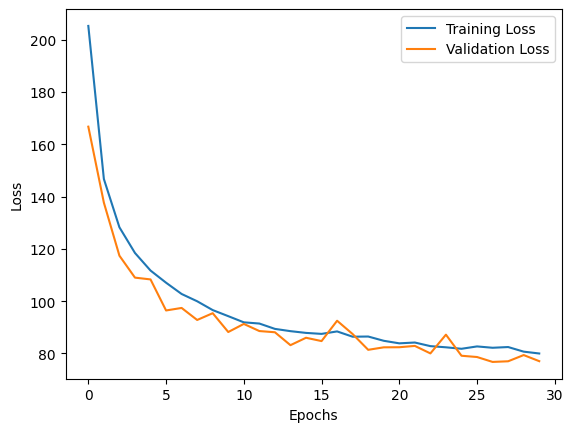

In [63]:
    # learning_rate = 0.002 epoch = 50 dropout = 0.01
    # Plot the training and validation loss over epochs
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [68]:
model.save('retail_sales_model_nn_keras')

In [72]:
# Path of the folder to be zipped
folder_path = "/content/retail_sales_model_nn_keras"

# Destination path for the zip file
zip_path = "/content/retail_sales_model_nn_keras.zip"

# Zip the folder
!zip -r {zip_path} {folder_path}

  adding: content/retail_sales_model_nn_keras/ (stored 0%)
  adding: content/retail_sales_model_nn_keras/variables/ (stored 0%)
  adding: content/retail_sales_model_nn_keras/variables/variables.index (deflated 66%)
  adding: content/retail_sales_model_nn_keras/variables/variables.data-00000-of-00001 (deflated 53%)
  adding: content/retail_sales_model_nn_keras/assets/ (stored 0%)
  adding: content/retail_sales_model_nn_keras/keras_metadata.pb (deflated 92%)
  adding: content/retail_sales_model_nn_keras/fingerprint.pb (stored 0%)
  adding: content/retail_sales_model_nn_keras/saved_model.pb (deflated 90%)


In [27]:
!unzip /content/retail_sales_model_nn_keras.zip

Archive:  /content/retail_sales_model_nn_keras.zip
   creating: content/retail_sales_model_nn_keras/
   creating: content/retail_sales_model_nn_keras/variables/
  inflating: content/retail_sales_model_nn_keras/variables/variables.index  
  inflating: content/retail_sales_model_nn_keras/variables/variables.data-00000-of-00001  
   creating: content/retail_sales_model_nn_keras/assets/
  inflating: content/retail_sales_model_nn_keras/keras_metadata.pb  
 extracting: content/retail_sales_model_nn_keras/fingerprint.pb  
  inflating: content/retail_sales_model_nn_keras/saved_model.pb  


In [28]:
from keras.models import load_model
model = load_model('/content/content/retail_sales_model_nn_keras')

In [63]:
p_train = X_train.shape[1]
n_train = y_train.shape[0]
p_val = X_val.shape[1]
n_val = y_val.shape[0]

y_pred_train = model.predict(X_train_s)
y_pred_val = model.predict(X_val_s)

# Evaluation metrics for train data
rmse_train = np.sqrt(mean_squared_error(y_train_s, y_pred_train))
mae_train = mean_absolute_error(y_train_s, y_pred_train)
r2_train = r2_score(y_train_s, y_pred_train)
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1)) / (n_train - p_train - 1)
mape_train = (mae_train / np.mean(y_train_s)) * 100

# Evaluation metrics for val data
rmse_val = np.sqrt(mean_squared_error(y_val_s, y_pred_val))
mae_val = mean_absolute_error(y_val_s, y_pred_val)
r2_val = r2_score(y_val_s, y_pred_val)
adjusted_r2_val = 1 - ((1 - r2_val) * (n_val - 1)) / (n_val - p_val - 1)
mape_val = (mae_val / np.mean(y_val_s)) * 100
metrics = []
# Append valuation metrics to metrics list
metrics.append([
     rmse_train, mae_train, r2_train, adjusted_r2_train, mape_train[0],
    rmse_val, mae_val, r2_val, adjusted_r2_val, mape_val[0]
])

# Create dataframe for metrics
metrics_df = pd.DataFrame(
metrics,
columns=[
     'RMSE Train', 'MAE Train', 'R-squared Train', 'Adjusted R-squared Train', 'MAPE Train',
    'RMSE val', 'MAE val', 'R-squared val', 'Adjusted R-squared val', 'MAPE val'
]
)

# Format numeric columns
metrics_df = metrics_df.round(2)
metrics_df

5019/5019 [==============================] - 9s 2ms/step


,RMSE Train,MAE Train,R-squared Train,Adjusted R-squared Train,MAPE Train,RMSE val,MAE val,R-squared val,Adjusted R-squared val,MAPE val
0,8.72,6.44,0.74,0.74,7.9,8.78,6.48,0.74,0.74,7.96


### 1. Which Evaluation metrics did you consider for a positive business impact and why? Explain each evaluation metric's indication towards business and the business impact of the ML model used.

1. Root Mean Squared Error (RMSE):
   - RMSE measures the average deviation of predicted values from the actual values.
   - A lower RMSE suggests that the model's predictions are closer to the actual values, which is desirable for businesses relying on accurate predictions.

2. Mean Absolute Error (MAE):
   - MAE measures the average magnitude of errors between predicted and actual values.
   - MAE is more interpretable than RMSE since it represents the absolute difference between predictions and actual values.

3. R-squared (R^2) Score:
   - R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (target) explained by the independent variables (features).
   - R-squared ranges from 0 to 1, where 1 indicates a perfect fit.
   - Higher R-squared values indicate better model performance in capturing the relationship between features and the target variable.

4. Adjusted R-squared:
   - Adjusted R-squared adjusts the R-squared value by considering the number of features and the sample size.
   - It penalizes models with too many features that may overfit the data.
   - A higher adjusted R-squared value suggests better model performance in capturing the relevant information without overfitting.

5. Mean Absolute Percentage Error (MAPE):
   - MAPE measures the average percentage difference between predicted and actual values.
   - It provides a relative measure of the prediction accuracy.
   - Lower MAPE values indicate better accuracy, as the model's predictions are closer to the actual values.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

                                   Feature  Importance
1                                    Promo    0.511706
14                             StoreType_b    0.088158
17                            Assortment_b    0.059139
2                      CompetitionDistance    0.038465
16                            Assortment_a    0.024238
13                             StoreType_a    0.023550
15                             StoreType_d    0.021472
10                          StateHoliday_a    0.020922
9                           StateHoliday_0    0.020247
19           PromoInterval_Jan,Apr,Jul,Oct    0.018967
3                CompetitionOpenSinceMonth    0.017760
0                                DayOfWeek    0.016772
18                            Assortment_c    0.015925
22                CompetitionDistanceBin_4    0.015653
24                CompetitionDistanceBin_6    0.013998
4                                   Promo2    0.013767
11                          StateHoliday_b    0.013250
20        

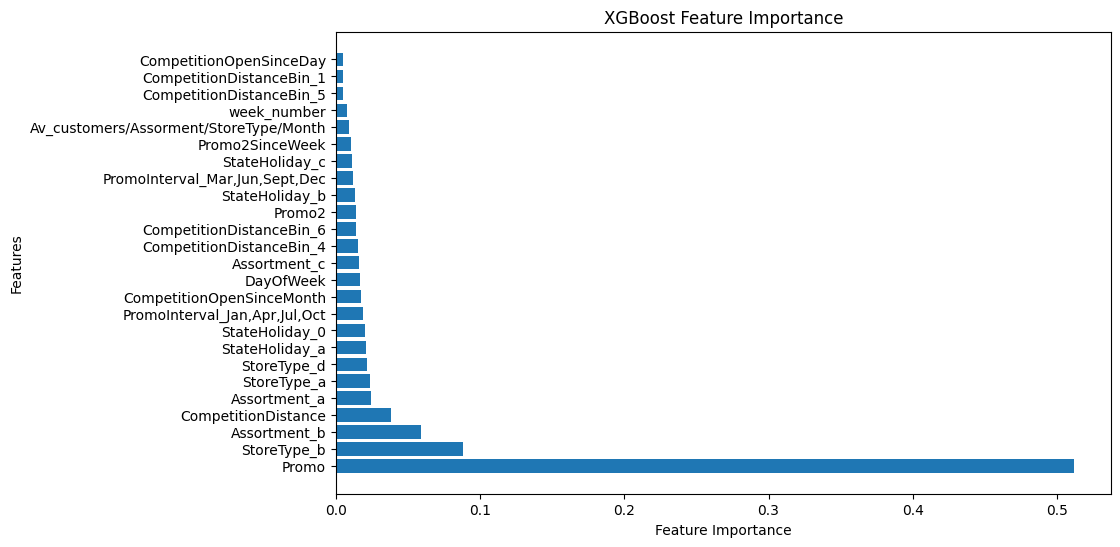

In [70]:
# Get feature importance
importance = XGB_model.feature_importances_

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***